In [1]:
import yaml
import matplotlib.pyplot as plt
import math
from functions import merge_years
from functions import merge, leakage_coefficient, correlation_factor
from functions import analyze_coefficient, avarage_mean, purity, plot_coefficient
import pandas as pd
import csv
from numpy import round as np_round

In [2]:
CR = ['SR', 'onemuCR', 'twomuCR', 'twoeCR']
CR_label = ['SR', '1muCR', '2muCR', '2eCR']
met_regions = ['ISR1', 'ISR2', 'ISR3', 'ESR1', 'ESR2']


tight_selections = ['tight','tight3', 'tight4', 'tight5', 'nottight']
not_tight_selections = ['tight3', 'tight4', 'tight5']
isolation_variations = ['up', 'iso', 'down']
regions = [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR']

## Data loading

In [3]:
dati = 'dati_buoni'
directories = [dati+'/txt files 15-16', dati+'/txt files 17', dati+'/txt files 18']

_Wgamma     = []
_Zgamma     = []
_Znunugamma = []
_Wjets      = []
_Zjets      = []
_data       = []

_gammajets_sig  = []
_gammajets_bkg  = []

for directory in directories:
    
    with open(directory + '/Wgamma.txt', 'r') as f:
        _Wgamma.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/Zgamma.txt', 'r') as f:
        _Zgamma.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/Znunugamma.txt', 'r') as f:
        _Znunugamma.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/Wjets.txt', 'r') as f:
        _Wjets.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/Zjets.txt', 'r') as f:
        _Zjets.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/data.txt', 'r') as f:
        _data.append(yaml.load(f, Loader=yaml.SafeLoader))
        
    with open(directory + '/gammajets_sig.txt', 'r') as f:
        _gammajets_sig.append(yaml.load(f, Loader=yaml.SafeLoader))
    with open(directory + '/gammajets_bkg.txt', 'r') as f:
        _gammajets_bkg.append(yaml.load(f, Loader=yaml.SafeLoader))
        
        

Wgamma     = merge_years(_Wgamma)
Zgamma     = merge_years(_Zgamma)
Znunugamma = merge_years(_Znunugamma)
Wjets      = merge_years(_Wjets)
Zjets      = merge_years(_Zjets)
data       = merge_years(_data, data=True)

gammajets_sig  = merge_years(_gammajets_sig)
gammajets_bkg  = merge_years(_gammajets_bkg)




signal = {'Wgamma': Wgamma,
          'Zgamma': Zgamma,
          'Znunugamma': Znunugamma}#,
          #'gammajets_sig': gammajets_sig}

background = {'Wjets': Wjets,
              'Zjets': Zjets}#,
              #'gammajets_bkg': gammajets_bkg}

## Tightness systematics

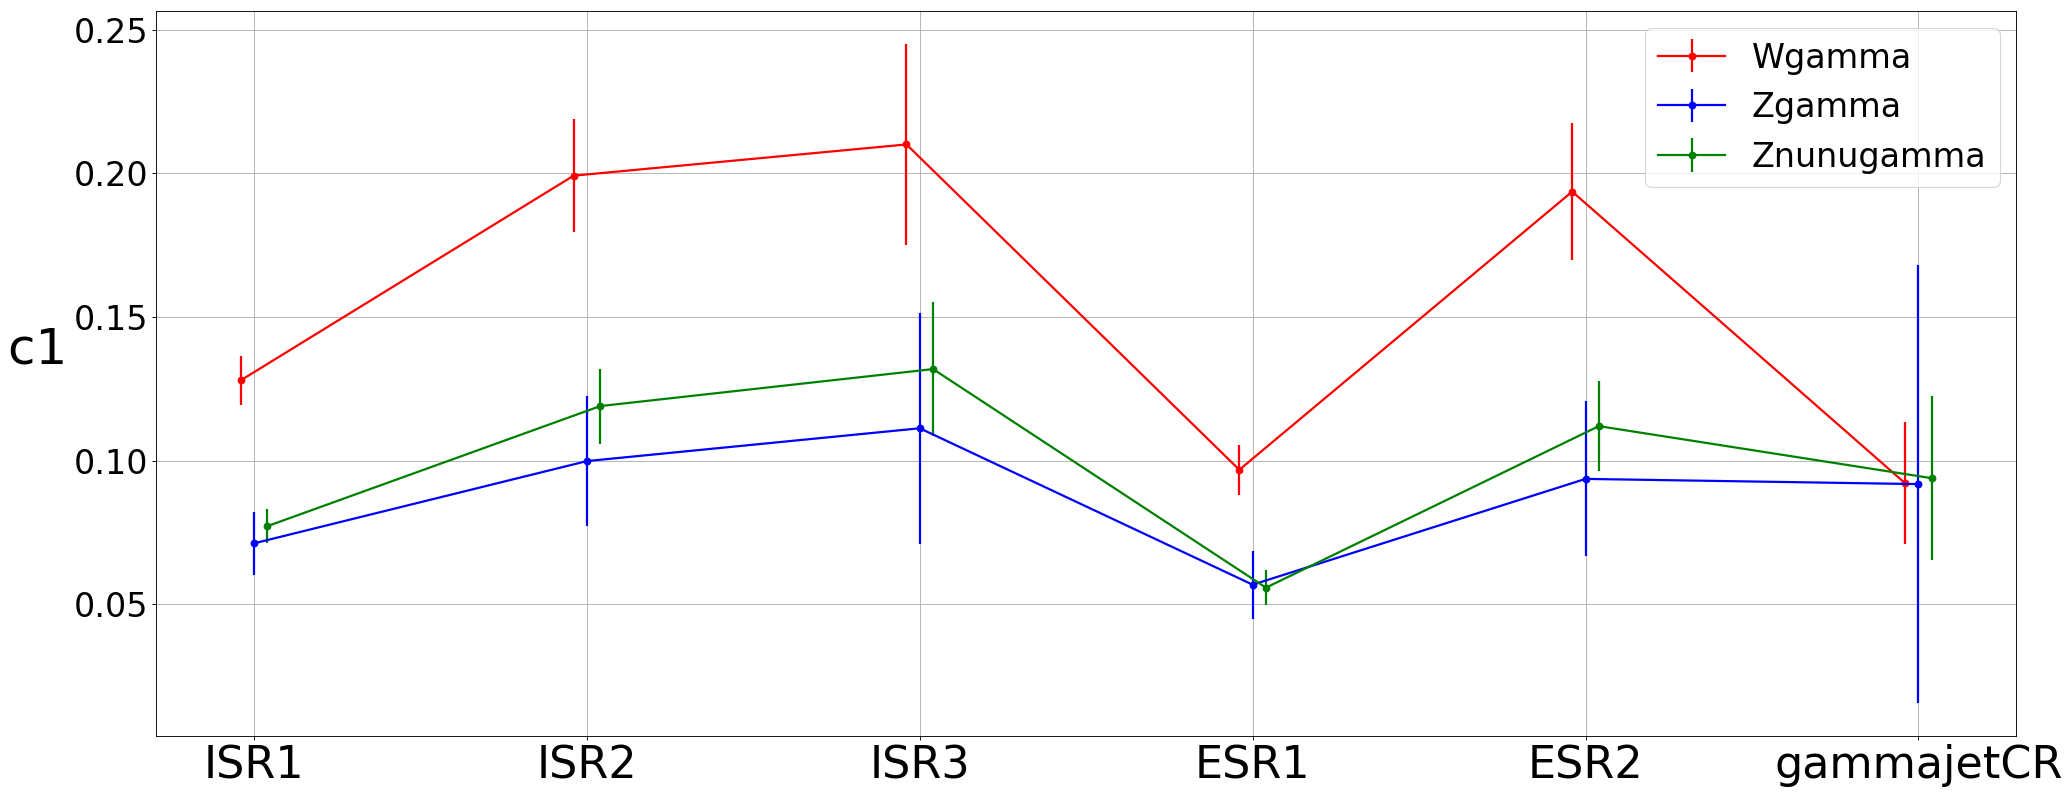

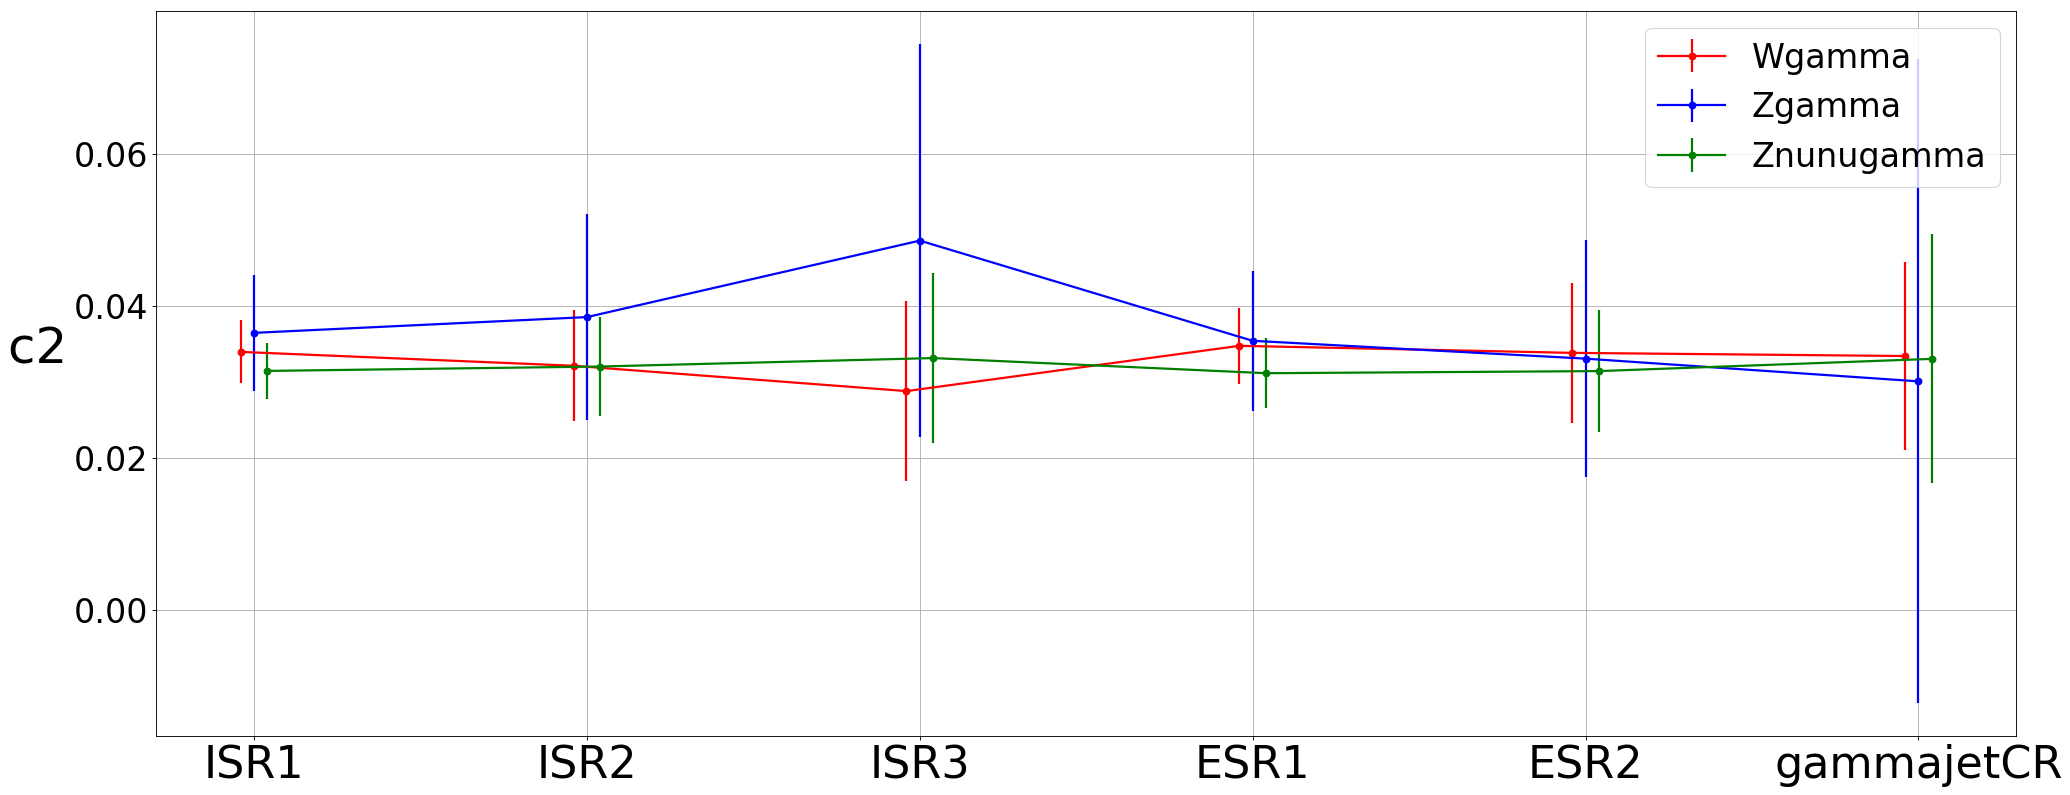

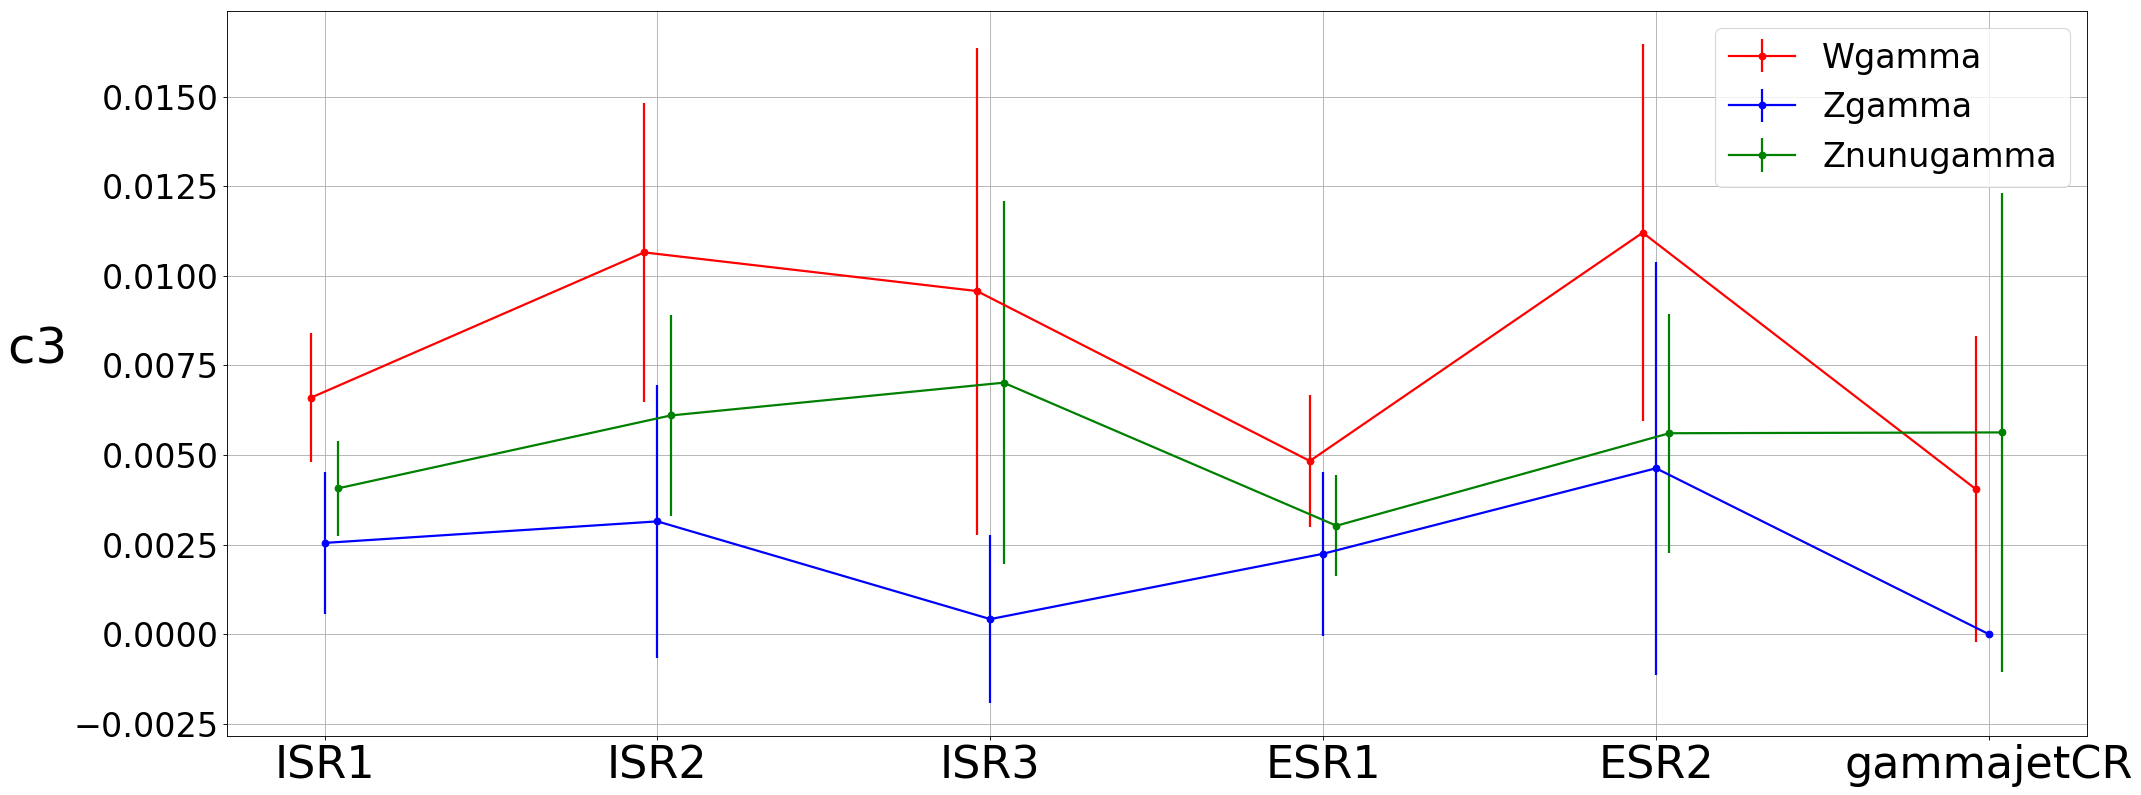

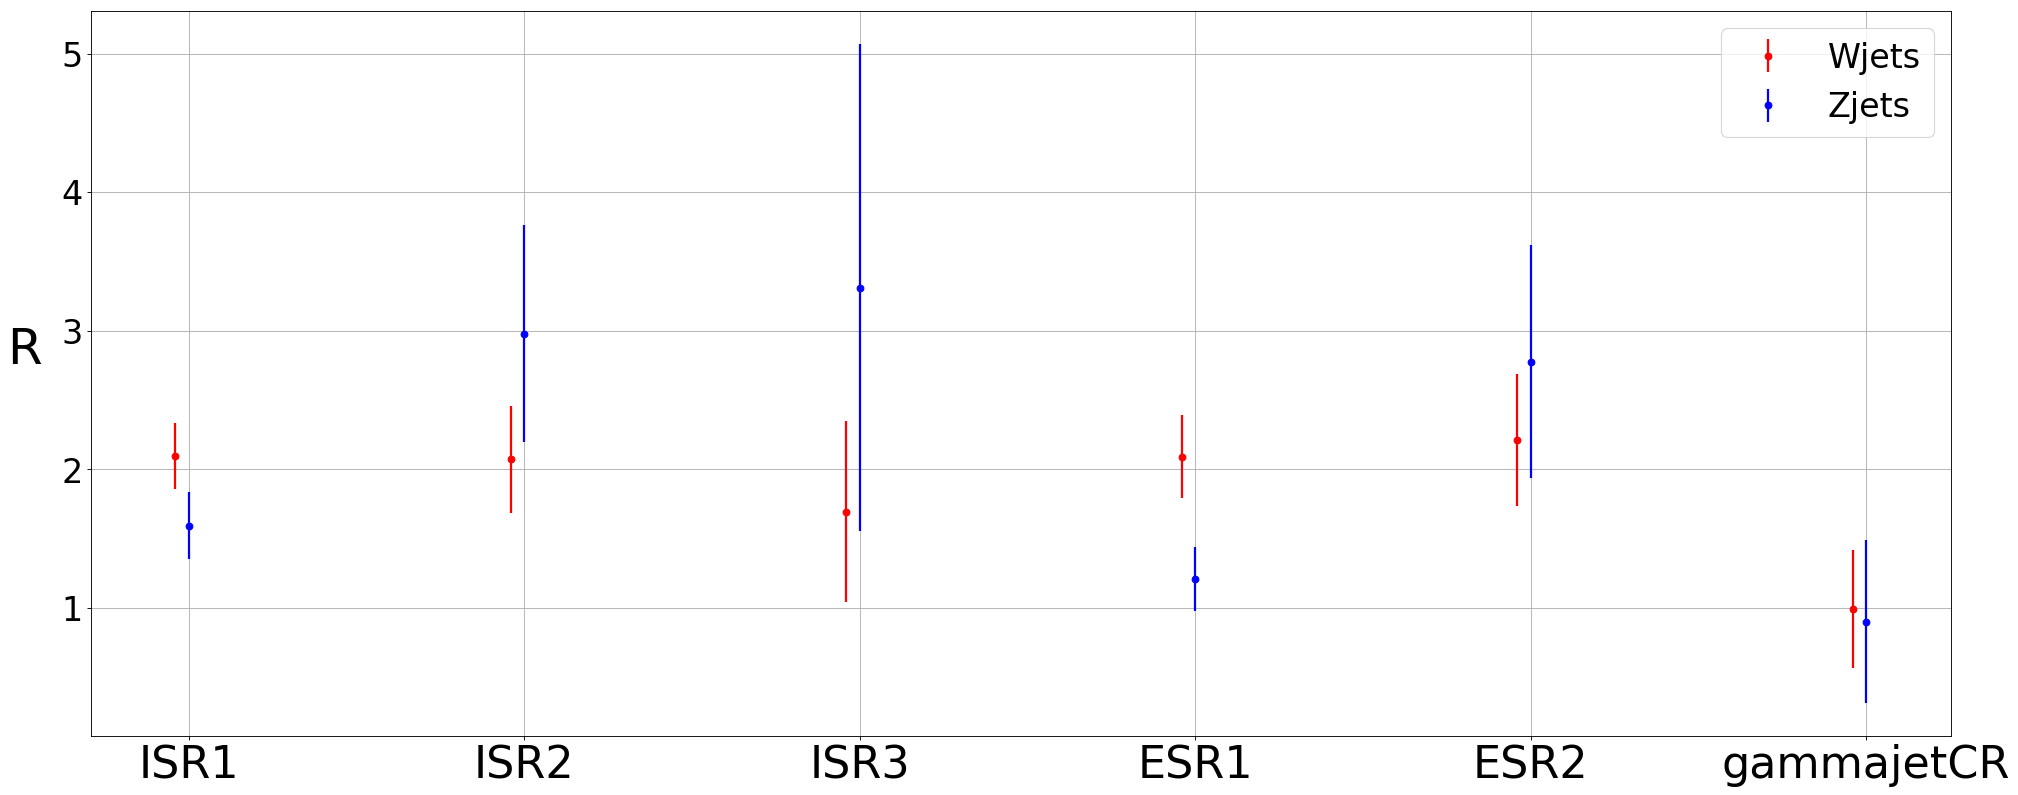

In [34]:
purity_tightness = {}
iso = 'iso'

for not_tight in not_tight_selections:
    
    # calcolo dei coefficienti di leakage e correlazione
    c1 = {}
    c2 = {}
    c3 = {}
    R  = {}

    for key in signal:
        
        Na = merge(signal, key, 'tight', iso, 'Na')
        Nb = merge(signal, key, 'tight', iso, 'Nb')
        Ma = merge(signal, key, not_tight, iso, 'Na')
        Mb = merge(signal, key, not_tight, iso, 'Nb')
        
        # Na = [signal[key][cr][met]['tight'][iso]['Na'] for cr in CR for met in met_regions] + [signal[key]['gammajetCR']['tight'][iso]['Na']]
        # Nb = [signal[key][cr][met]['tight'][iso]['Nb'] for cr in CR for met in met_regions] + [signal[key]['gammajetCR']['tight'][iso]['Nb']]
        # Ma = [signal[key][cr][met][not_tight][iso]['Na'] for cr in CR for met in met_regions] + [signal[key]['gammajetCR'][not_tight][iso]['Na']]
        # Mb = [signal[key][cr][met][not_tight][iso]['Nb'] for cr in CR for met in met_regions] + [signal[key]['gammajetCR'][not_tight][iso]['Nb']]
                
        c1.update({key: leakage_coefficient(Nb,Na)})
        c2.update({key: leakage_coefficient(Ma,Na)})
        c3.update({key: leakage_coefficient(Mb,Na)})
        

    for key in background:

        Na = merge(background, key, 'tight', iso, 'Na')
        Nb = merge(background, key, 'tight', iso, 'Nb')
        Ma = merge(background, key, not_tight, iso, 'Na')
        Mb = merge(background, key, not_tight, iso, 'Nb')
        
        # Na = [background[key][cr][met]['tight'][iso]['Na'] for cr in CR for met in met_regions] + [background[key]['gammajetCR']['tight'][iso]['Na']]
        # Nb = [background[key][cr][met]['tight'][iso]['Nb'] for cr in CR for met in met_regions] + [background[key]['gammajetCR']['tight'][iso]['Nb']]
        # Ma = [background[key][cr][met][not_tight][iso]['Na'] for cr in CR for met in met_regions] + [background[key]['gammajetCR'][not_tight][iso]['Na']]
        # Mb = [background[key][cr][met][not_tight][iso]['Nb'] for cr in CR for met in met_regions] + [background[key]['gammajetCR'][not_tight][iso]['Nb']]
        
        R.update({key: correlation_factor(Na,Nb,Ma,Mb)})
        
    
    if not_tight == 'tight4':

        plot_coefficient(c1, 'c1')
        plot_coefficient(c2, 'c2')
        plot_coefficient(c3, 'c3')
        plot_coefficient(R, 'R')


    # from 5+1 values for each coefficient we want 21 values, one for each region
    c1 = analyze_coefficient(c1)
    c2 = analyze_coefficient(c2)
    c3 = analyze_coefficient(c3)
    R  = analyze_coefficient(R)
        
        
    # calcolo della purezza
    Na = [data[cr][met_region]['tight'][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Na']]
    Nb = [data[cr][met_region]['tight'][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Nb']]
    Ma = [data[cr][met_region][not_tight][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Na']]
    Mb = [data[cr][met_region][not_tight][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Nb']]

    if not_tight == 'tight4':
        
        nominal_coeff = {'c1': c1, 'c2': c2, 'c3': c3, 'R': R}
        nominal_Na = [Na[i] for i in range(len(Na))]
        nominal_Nb = [Nb[i] for i in range(len(Na))]
        nominal_Ma = [Ma[i] for i in range(len(Na))]
        nominal_Mb = [Mb[i] for i in range(len(Na))]
        
        
    purity_tightness.update({not_tight: purity(Na, Nb, Ma, Mb, c1, c2, c3, R)})
    

tightness_systematics = [max(abs(purity_tightness['tight3']['mean'][i] - purity_tightness['tight4']['mean'][i]),\
                             abs(purity_tightness['tight5']['mean'][i] - purity_tightness['tight4']['mean'][i])) for i in range(21)]


# solo per dati 2017, problemi nella 2muCR - ISR3
tightness_systematics[12] = abs(purity_tightness['tight5']['mean'][13] - purity_tightness['tight4']['mean'][13])


Text(0, 0.5, 'P [%]        ')

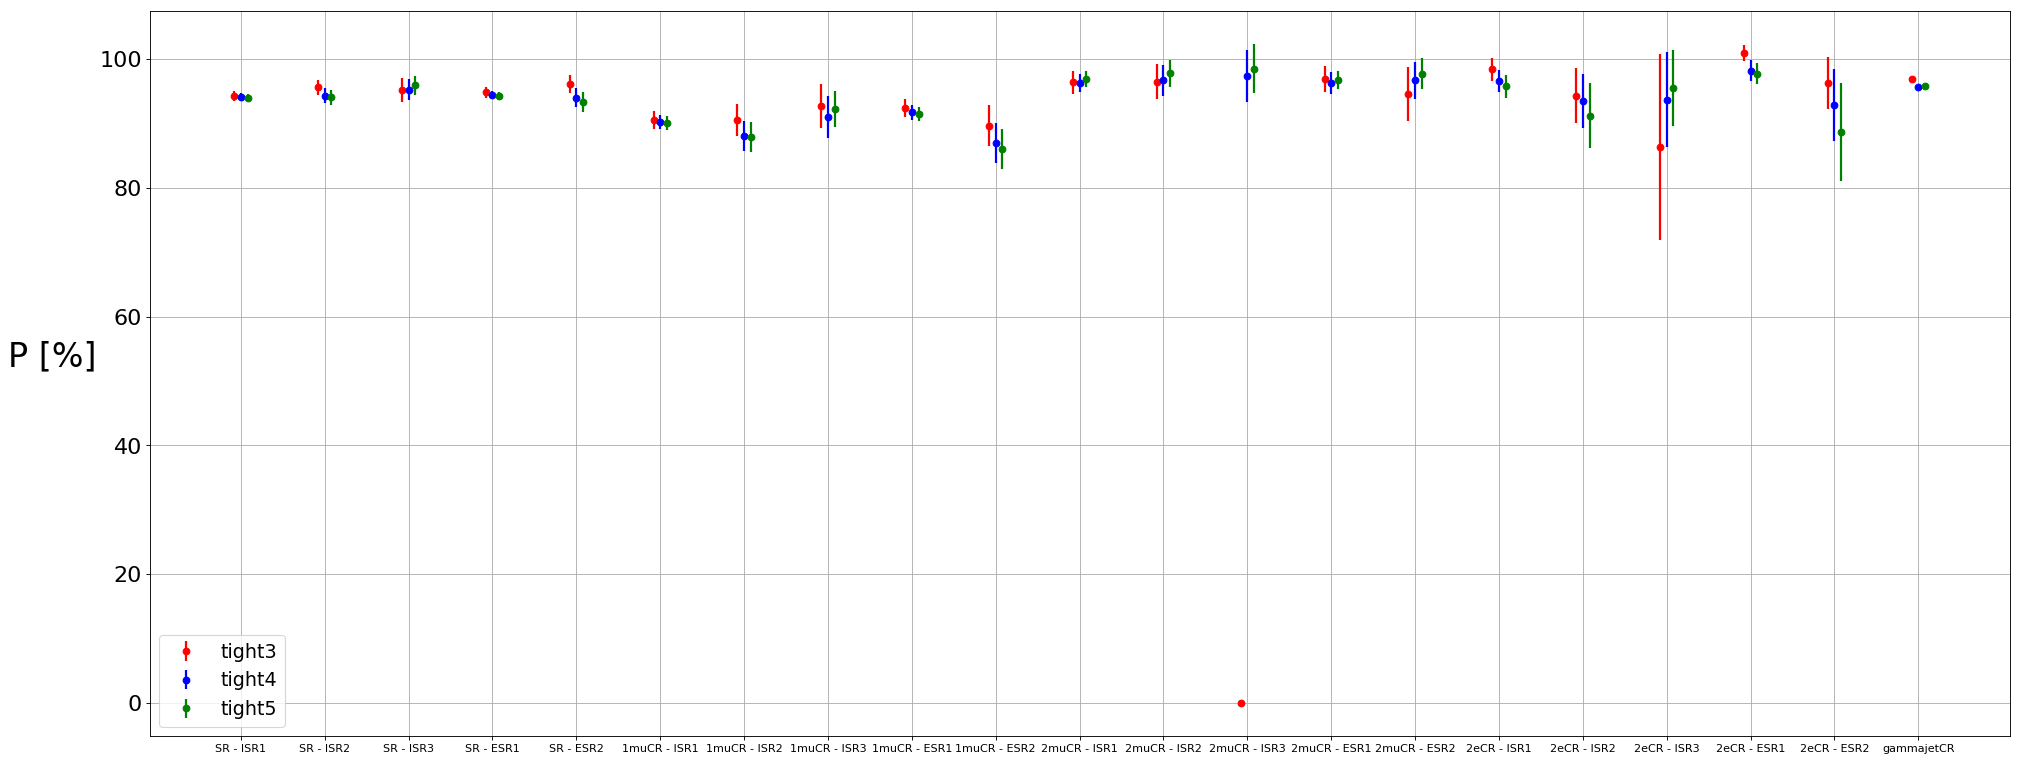

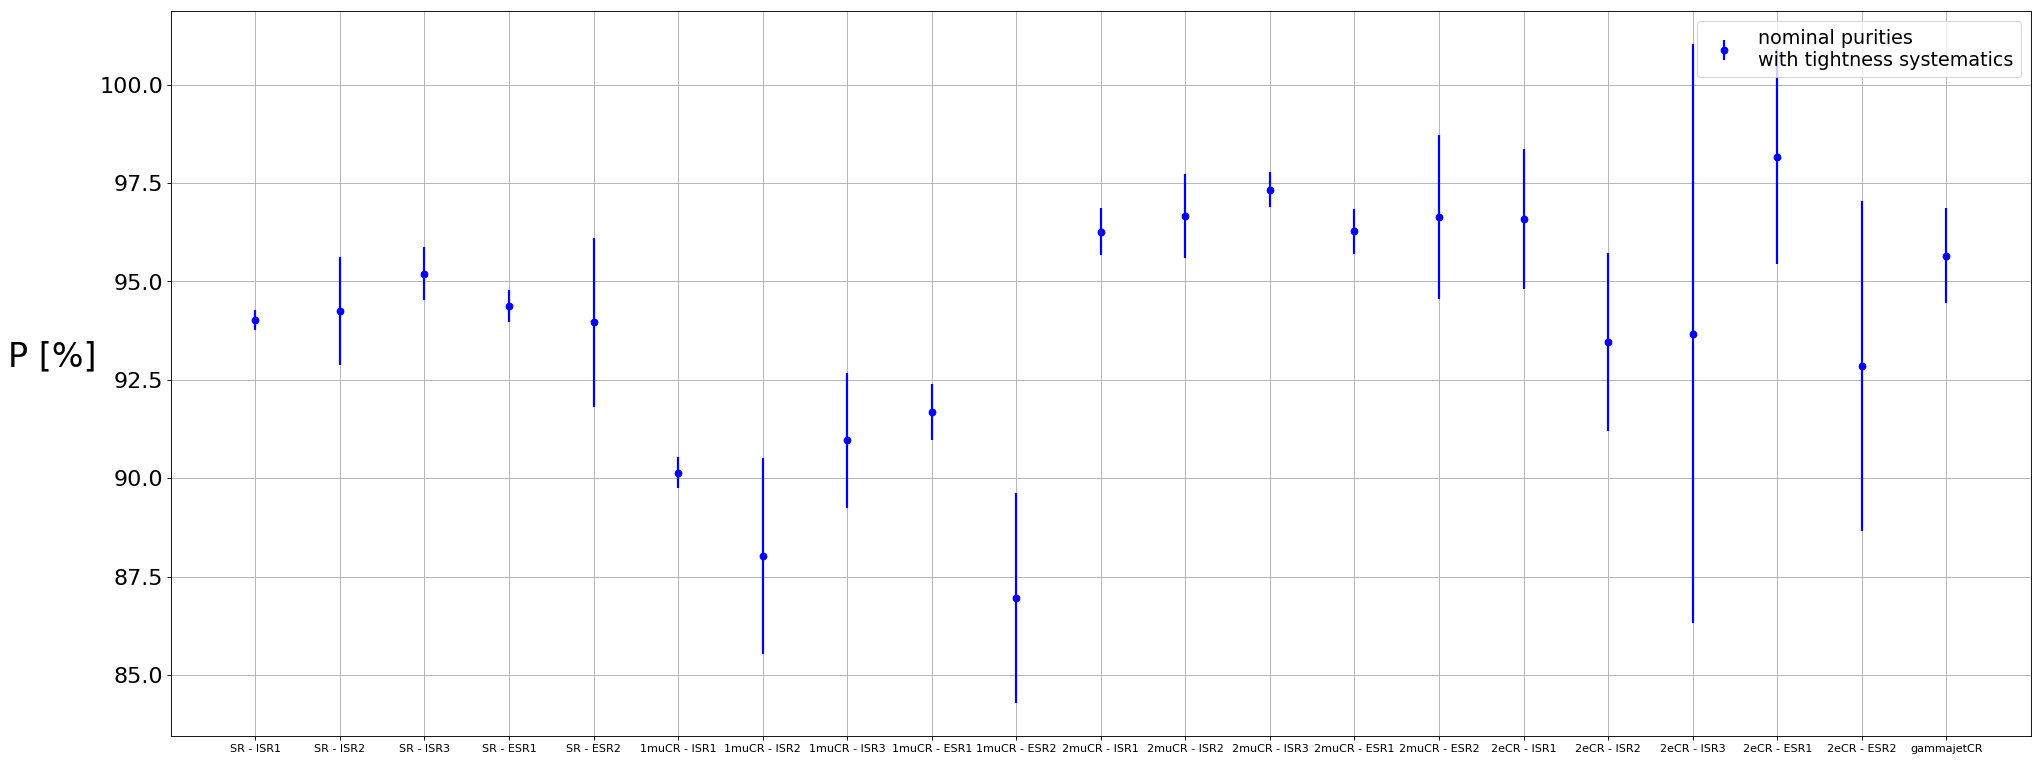

In [35]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_tightness[not_tight_selections[0]]['mean'], yerr=purity_tightness[not_tight_selections[0]]['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label=not_tight_selections[0])
plt.errorbar([i+0.00 for i in range(21)], purity_tightness[not_tight_selections[1]]['mean'], yerr=purity_tightness[not_tight_selections[1]]['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label=not_tight_selections[1])
plt.errorbar([i+0.08 for i in range(21)], purity_tightness[not_tight_selections[2]]['mean'], yerr=purity_tightness[not_tight_selections[2]]['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label=not_tight_selections[2])

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)


plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i for i in range(21)], purity_tightness['tight4']['mean'], yerr=tightness_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith tightness systematics')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

In [36]:
count_tight3 = 0
count_tight5 = 0
for i in range(21):
    
    delta_tight3 = abs(purity_tightness['tight3']['mean'][i] - purity_tightness['tight4']['mean'][i])
    delta_tight5 = abs(purity_tightness['tight5']['mean'][i] - purity_tightness['tight4']['mean'][i])
    
    if delta_tight3 > delta_tight5:
        print(regions[i] + '\t tight3')
        count_tight3 = count_tight3 + 1
        
    else:
        print(regions[i] + '\t tight5*')
        count_tight5 = count_tight5 + 1
        
print('\ncount_tight3 = ' + repr(count_tight3))
print('count_tight5 = ' + repr(count_tight5))

SR - ISR1	 tight3
SR - ISR2	 tight3
SR - ISR3	 tight5*
SR - ESR1	 tight3
SR - ESR2	 tight3
1muCR - ISR1	 tight3
1muCR - ISR2	 tight3
1muCR - ISR3	 tight3
1muCR - ESR1	 tight3
1muCR - ESR2	 tight3
2muCR - ISR1	 tight5*
2muCR - ISR2	 tight5*
2muCR - ISR3	 tight3
2muCR - ESR1	 tight3
2muCR - ESR2	 tight3
2eCR - ISR1	 tight3
2eCR - ISR2	 tight5*
2eCR - ISR3	 tight3
2eCR - ESR1	 tight3
2eCR - ESR2	 tight5*
gammajetCR	 tight3

count_tight3 = 16
count_tight5 = 5


## Isolation systematics

In [37]:
purity_isolation = {}
not_tight = 'tight4'

for iso in isolation_variations:
    
    # calcolo dei coefficienti di leakage e correlazione
    c1 = {}
    c2 = {}
    c3 = {}
    R  = {}

    for key in signal:
        
        Na = merge(signal, key, 'tight', iso, 'Na')
        Nb = merge(signal, key, 'tight', iso, 'Nb')
        Ma = merge(signal, key, not_tight, iso, 'Na')
        Mb = merge(signal, key, not_tight, iso, 'Nb')
                
        c1.update({key: leakage_coefficient(Nb,Na)})
        c2.update({key: leakage_coefficient(Ma,Na)})
        c3.update({key: leakage_coefficient(Mb,Na)})


    for key in background:

        Na = merge(background, key, 'tight', iso, 'Na')
        Nb = merge(background, key, 'tight', iso, 'Nb')
        Ma = merge(background, key, not_tight, iso, 'Na')
        Mb = merge(background, key, not_tight, iso, 'Nb')
        
        R.update({key: correlation_factor(Na,Nb,Ma,Mb)})

    
    #plot_coefficient(c1, 'c1')
    #plot_coefficient(c2, 'c2')
    #plot_coefficient(c3, 'c3')
    #plot_coefficient(R, 'R')


    # from 5+1 values for each coefficient we want 21 values, one for each region
    c1 = analyze_coefficient(c1)
    c2 = analyze_coefficient(c2)
    c3 = analyze_coefficient(c3)
    R  = analyze_coefficient(R)


    Na = [data[cr][met_region]['tight'][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Na']]
    Nb = [data[cr][met_region]['tight'][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Nb']]
    Ma = [data[cr][met_region][not_tight][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Na']]
    Mb = [data[cr][met_region][not_tight][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Nb']]


        
    purity_isolation.update({iso: purity(Na, Nb, Ma, Mb, c1, c2, c3, R)})
    
    
isolation_systematics = [max(abs(purity_isolation['up']['mean'][i] - purity_isolation['iso']['mean'][i]),\
                             abs(purity_isolation['down']['mean'][i] - purity_isolation['iso']['mean'][i])) for i in range(len(purity_isolation['up']['mean']))]

Text(0, 0.5, 'P [%]        ')

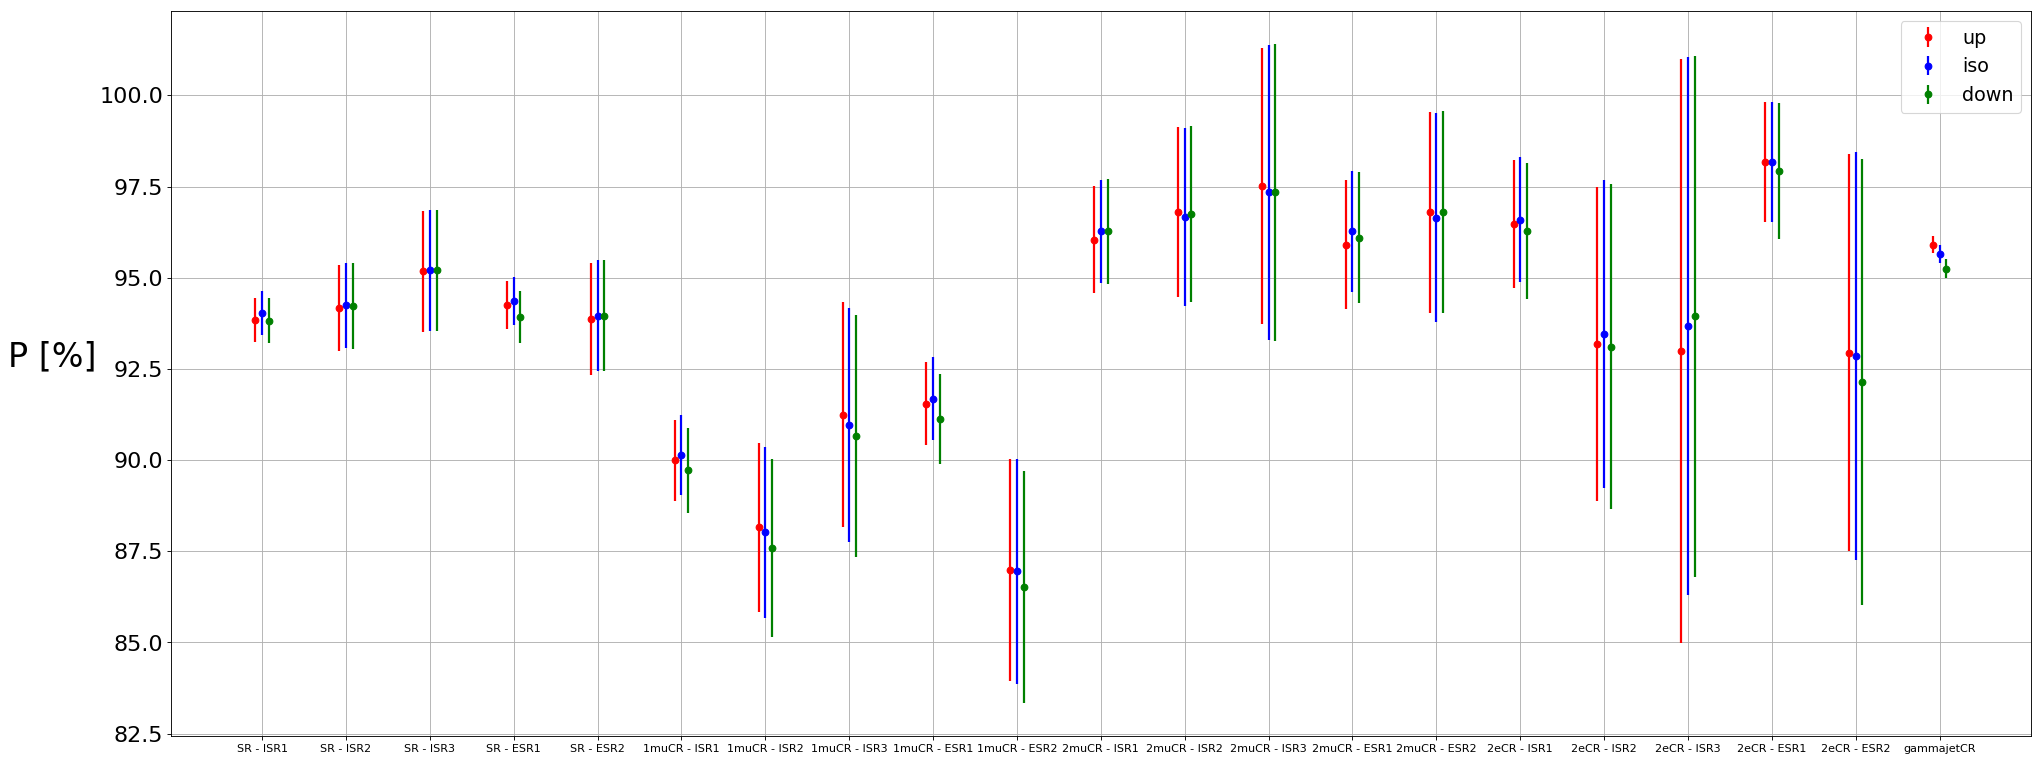

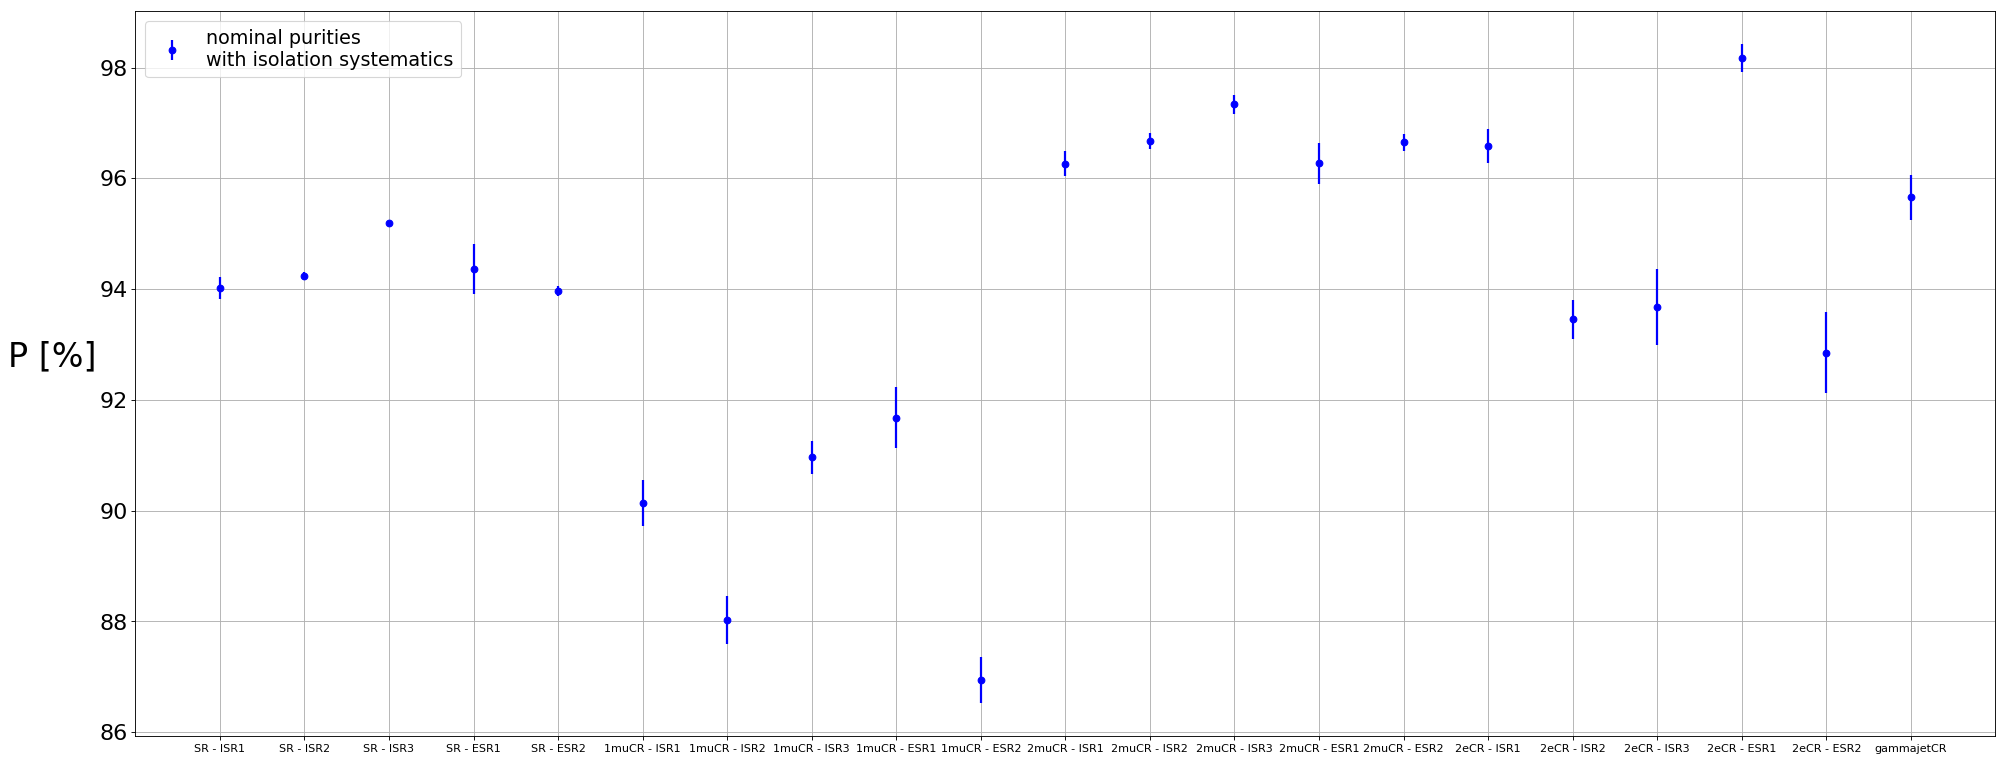

In [38]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_isolation[isolation_variations[0]]['mean'], yerr=purity_isolation[isolation_variations[0]]['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label=isolation_variations[0])
plt.errorbar([i+0.00 for i in range(21)], purity_isolation[isolation_variations[1]]['mean'], yerr=purity_isolation[isolation_variations[1]]['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label=isolation_variations[1])
plt.errorbar([i+0.08 for i in range(21)], purity_isolation[isolation_variations[2]]['mean'], yerr=purity_isolation[isolation_variations[2]]['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label=isolation_variations[2])

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=isolation_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith isolation systematics')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

## Coefficients systematics

In [39]:
nominal_purity = {'mean': [purity_isolation['iso']['mean'][i] for i in range(21)],
                  'sigma': [purity_isolation['iso']['sigma'][i] for i in range(21)]}

sigma_c1_ = [ purity_isolation['iso']['sigma_c1'][i] for i in range(21) ]
sigma_c2_ = [ purity_isolation['iso']['sigma_c2'][i] for i in range(21) ]
sigma_c3_ = [ purity_isolation['iso']['sigma_c3'][i] for i in range(21) ]
sigma_R_  = [ purity_isolation['iso']['sigma_R'][i] for i in range(21) ]

### c1

In [40]:
coeff_up = {'mean': [nominal_coeff['c1']['mean'][i] + nominal_coeff['c1']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c1']['sigma'][i] for i in range(21)]}

purity_up = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, coeff_up, nominal_coeff['c2'],\
                   nominal_coeff['c3'], nominal_coeff['R'])


coeff_down = {'mean': [nominal_coeff['c1']['mean'][i] - nominal_coeff['c1']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c1']['sigma'][i] for i in range(21)]}

purity_down = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, coeff_down, nominal_coeff['c2'],\
                   nominal_coeff['c3'], nominal_coeff['R'])



c1_systematics = [max(abs(purity_up['mean'][i] - nominal_purity['mean'][i]), abs(purity_down['mean'][i] - nominal_purity['mean'][i])) for i in range(21)]

Text(0, 0.5, 'P [%]        ')

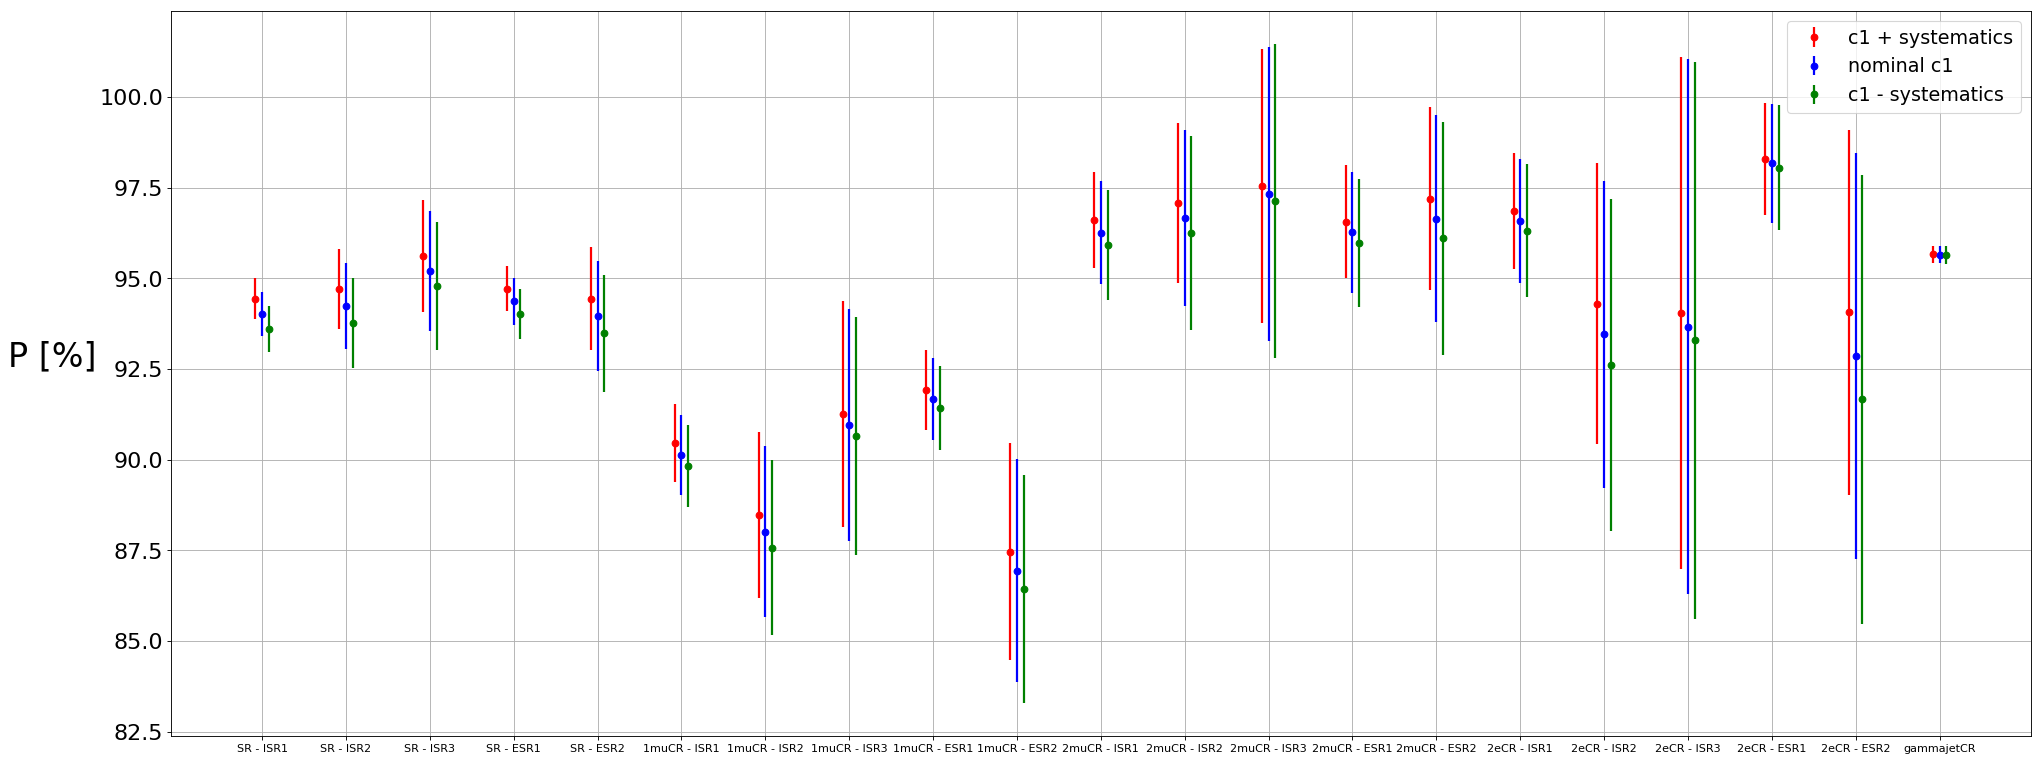

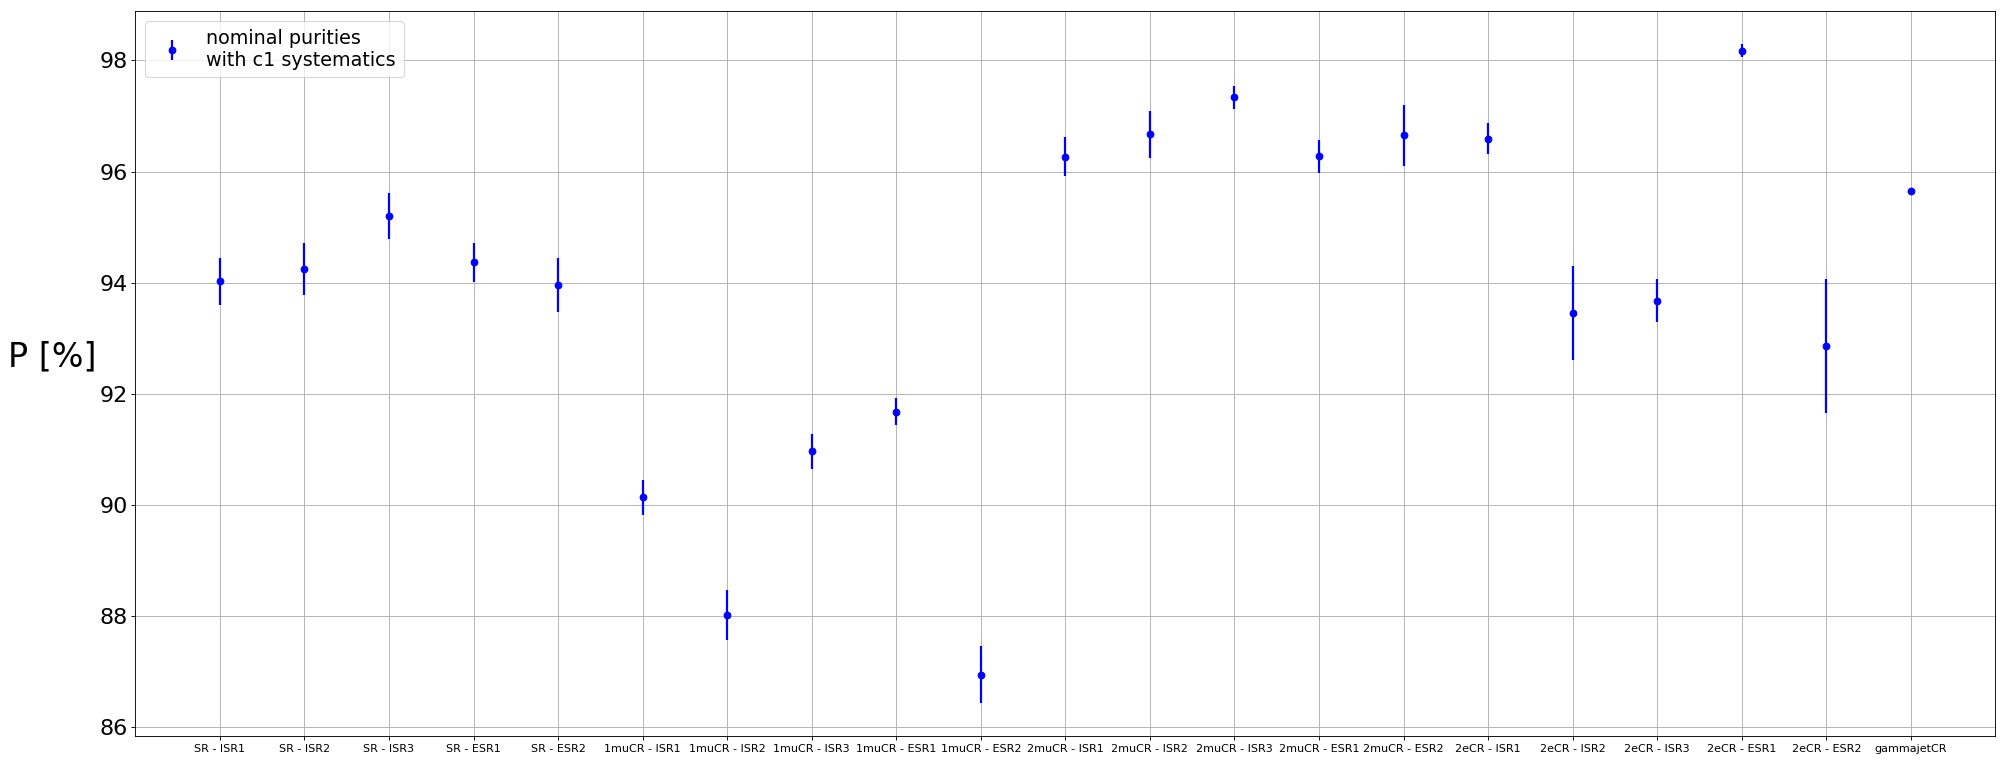

In [41]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_up['mean'],      yerr=purity_up['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='c1 + systematics')
plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=nominal_purity['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label='nominal c1')
plt.errorbar([i+0.08 for i in range(21)], purity_down['mean'],    yerr=purity_down['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label='c1 - systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=c1_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith c1 systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

### c2

In [42]:
coeff_up = {'mean': [nominal_coeff['c2']['mean'][i] + nominal_coeff['c2']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c2']['sigma'][i] for i in range(21)]}

purity_up = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], coeff_up,\
                   nominal_coeff['c3'], nominal_coeff['R'])


coeff_down = {'mean': [nominal_coeff['c2']['mean'][i] - nominal_coeff['c2']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c2']['sigma'][i] for i in range(21)]}

purity_down = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], coeff_down,\
                   nominal_coeff['c3'], nominal_coeff['R'])




c2_systematics = [max(abs(purity_up['mean'][i] - nominal_purity['mean'][i]),\
                      abs(purity_down['mean'][i] - nominal_purity['mean'][i])) for i in range(21)]


Text(0, 0.5, 'P [%]        ')

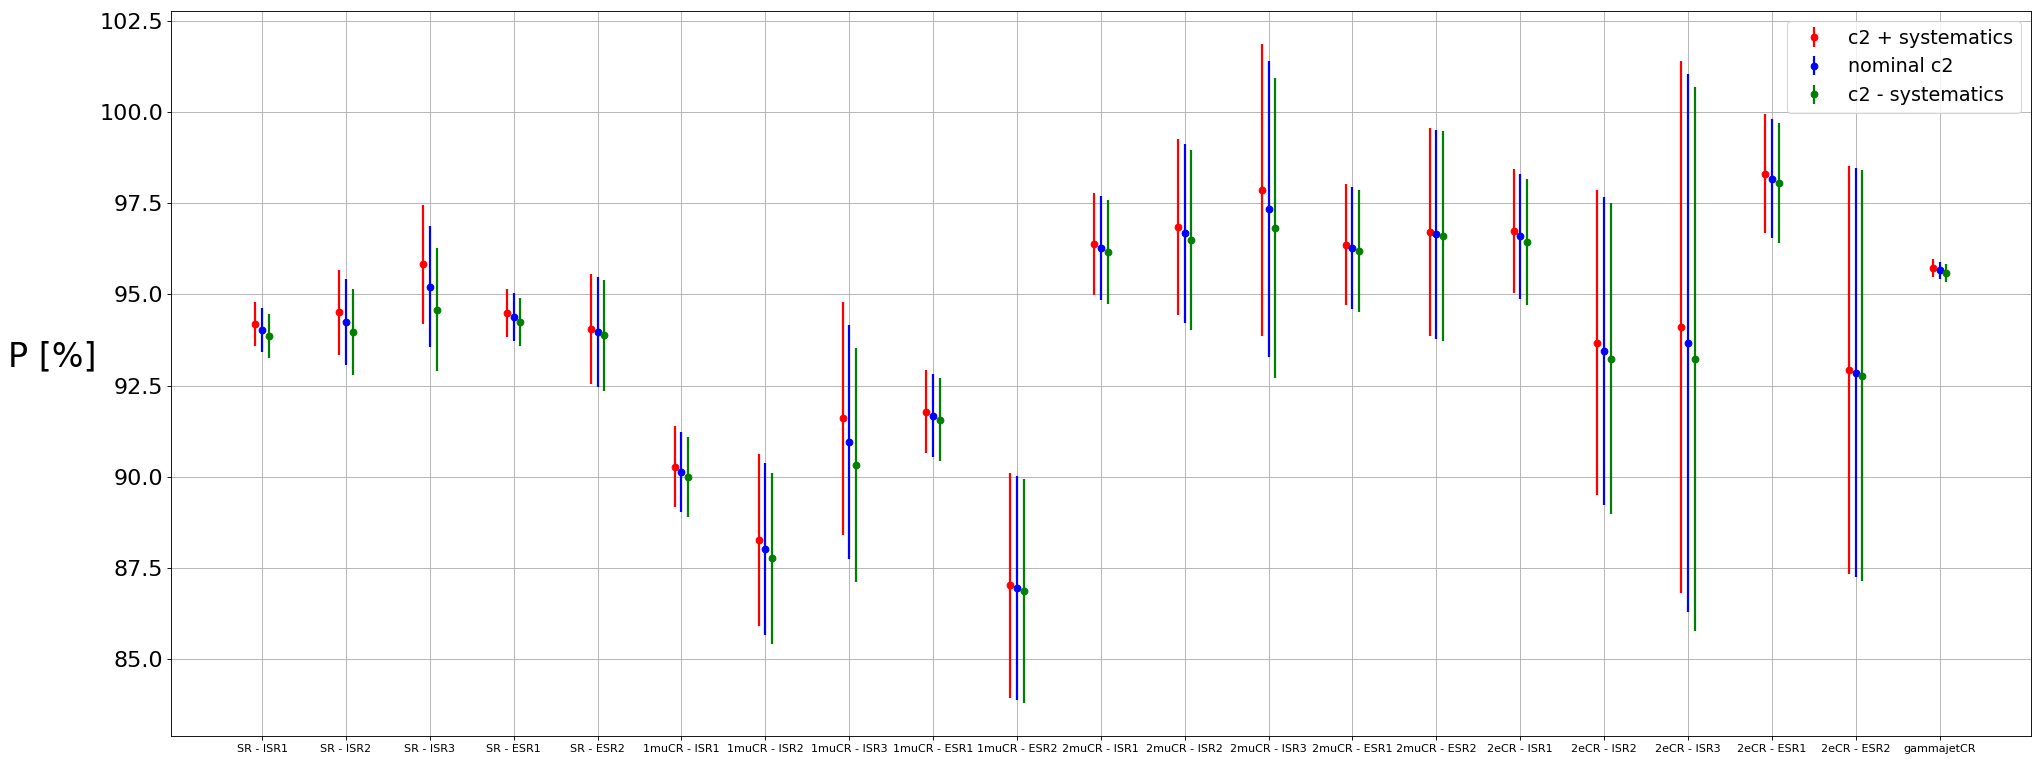

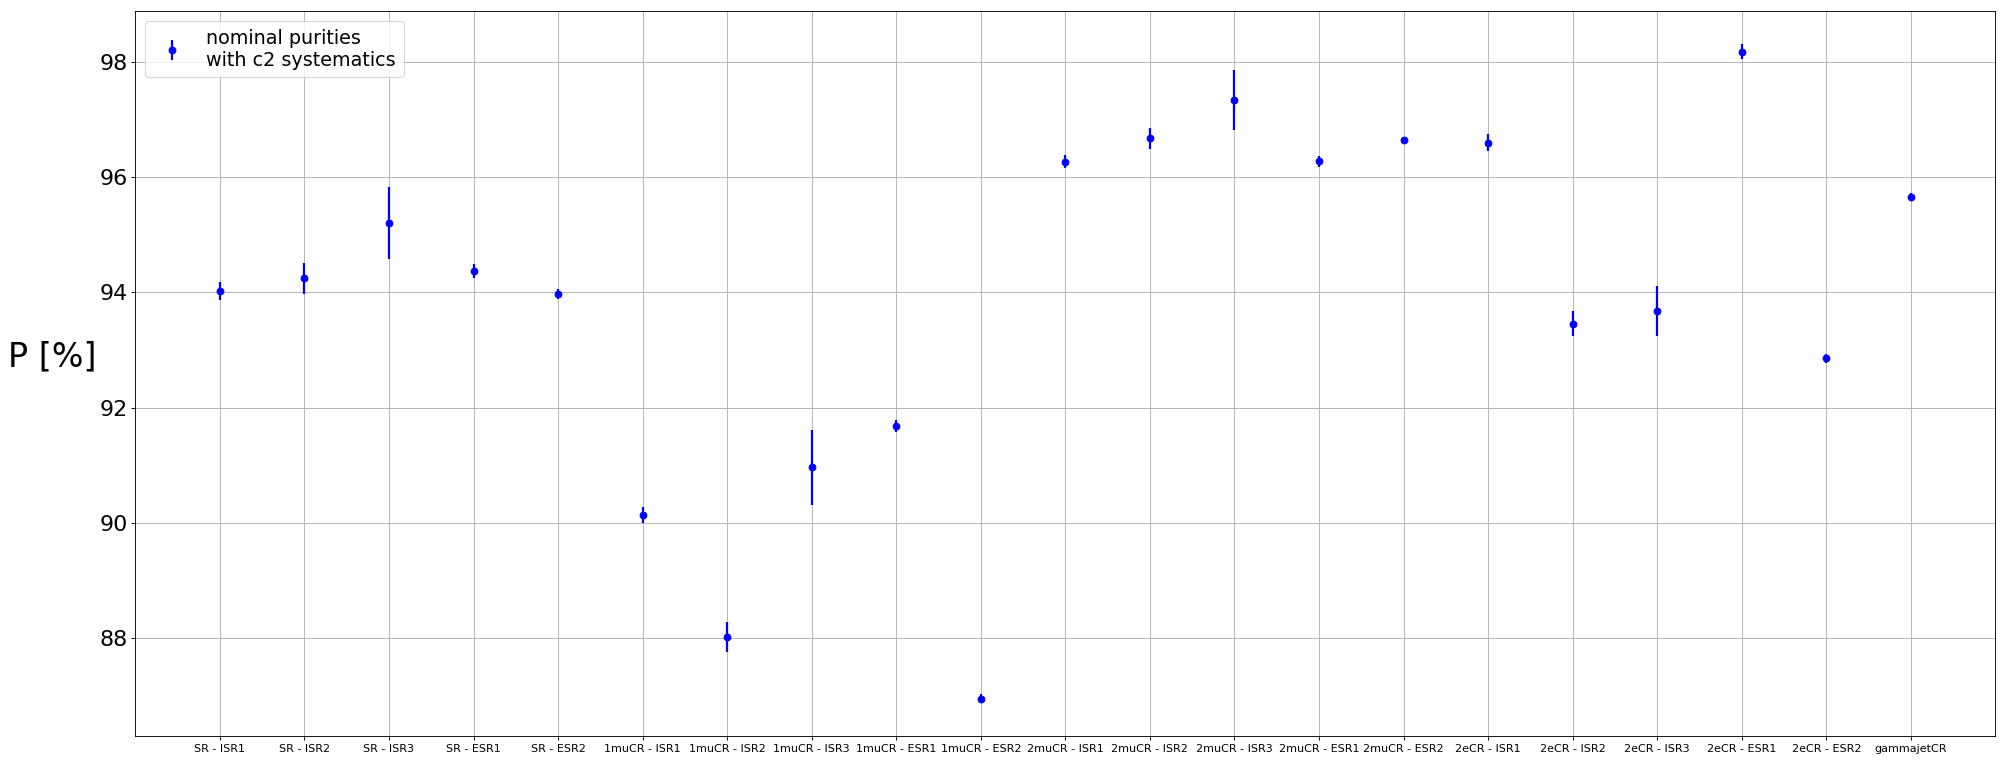

In [43]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_up['mean'],      yerr=purity_up['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='c2 + systematics')
plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=nominal_purity['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label='nominal c2')
plt.errorbar([i+0.08 for i in range(21)], purity_down['mean'],    yerr=purity_down['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label='c2 - systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=c2_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith c2 systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

### c3

In [44]:
coeff_up = {'mean': [nominal_coeff['c3']['mean'][i] + nominal_coeff['c3']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c3']['sigma'][i] for i in range(21)]}

purity_up = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], nominal_coeff['c2'],\
                   coeff_up, nominal_coeff['R'])


coeff_down = {'mean': [nominal_coeff['c3']['mean'][i] - nominal_coeff['c3']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['c3']['sigma'][i] for i in range(21)]}

purity_down = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], nominal_coeff['c2'],\
                   coeff_down, nominal_coeff['R'])




c3_systematics = [max(abs(purity_up['mean'][i] - nominal_purity['mean'][i]),\
                      abs(purity_down['mean'][i] - nominal_purity['mean'][i])) for i in range(21)]

# solo per dati 2017, probelmi nelle 4 ISR3
for i in [2, 7, 12, 17]:
    c3_systematics[i] = abs(purity_up['mean'][i] - nominal_purity['mean'][i])

Text(0, 0.5, 'P [%]        ')

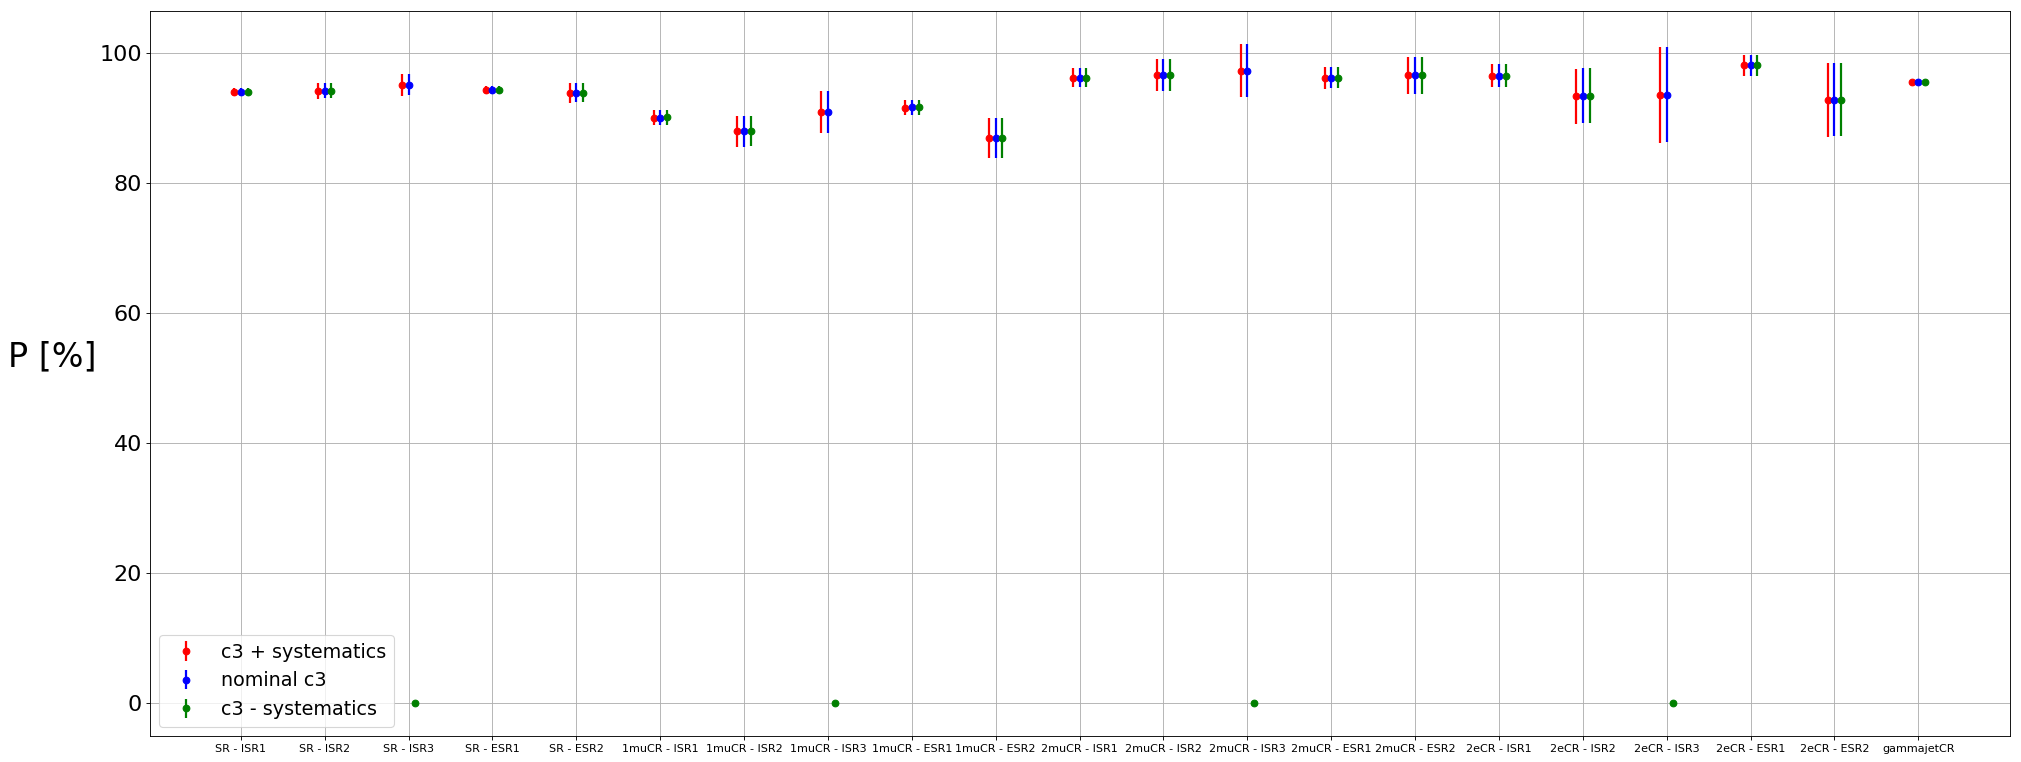

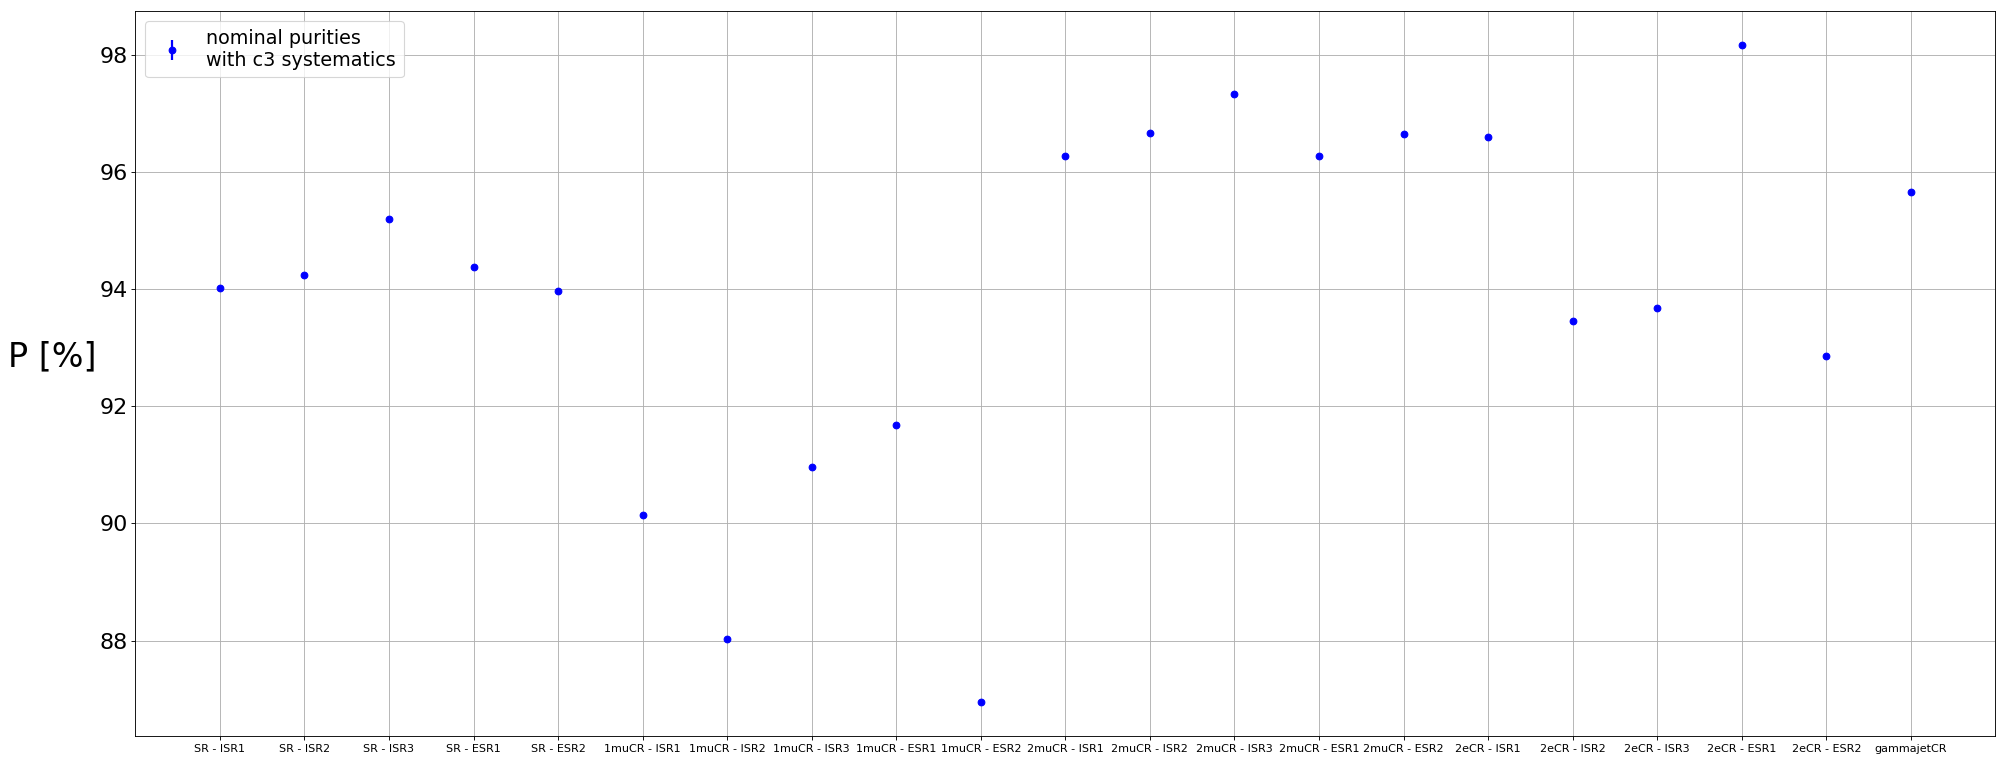

In [45]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_up['mean'],      yerr=purity_up['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='c3 + systematics')
plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=nominal_purity['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label='nominal c3')
plt.errorbar([i+0.08 for i in range(21)], purity_down['mean'],    yerr=purity_down['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label='c3 - systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=c3_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith c3 systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

### R

In [46]:
coeff_up = {'mean': [nominal_coeff['R']['mean'][i] + nominal_coeff['R']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['R']['sigma'][i] for i in range(21)]}

purity_up = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], nominal_coeff['c2'],\
                   nominal_coeff['c3'], coeff_up)


coeff_down = {'mean': [nominal_coeff['R']['mean'][i] - nominal_coeff['R']['systematics'][i] for i in range(21)],\
        'sigma': [nominal_coeff['R']['sigma'][i] for i in range(21)]}

purity_down = purity(nominal_Na, nominal_Nb, nominal_Ma, nominal_Mb, nominal_coeff['c1'], nominal_coeff['c2'],\
                   nominal_coeff['c3'], coeff_down)


R_systematics = [max(abs(purity_up['mean'][i] - nominal_purity['mean'][i]),\
                      abs(purity_down['mean'][i] - nominal_purity['mean'][i])) for i in range(21)]

R_systematics[20] = abs(purity_up['mean'][20] - nominal_purity['mean'][20])

Text(0, 0.5, 'P [%]        ')

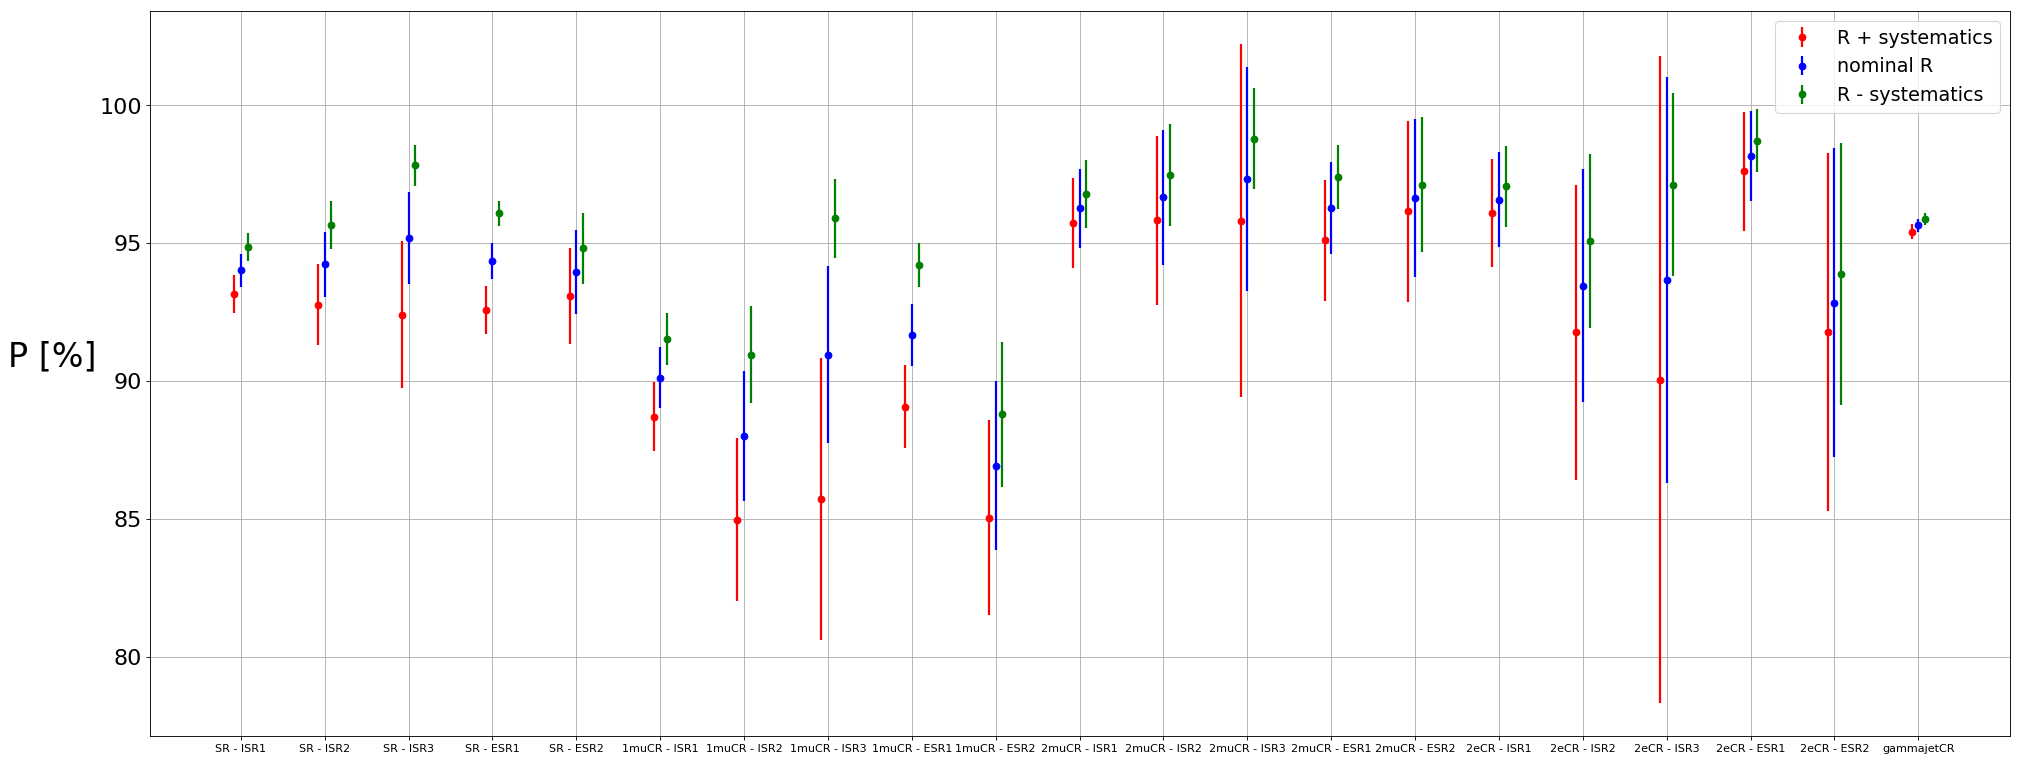

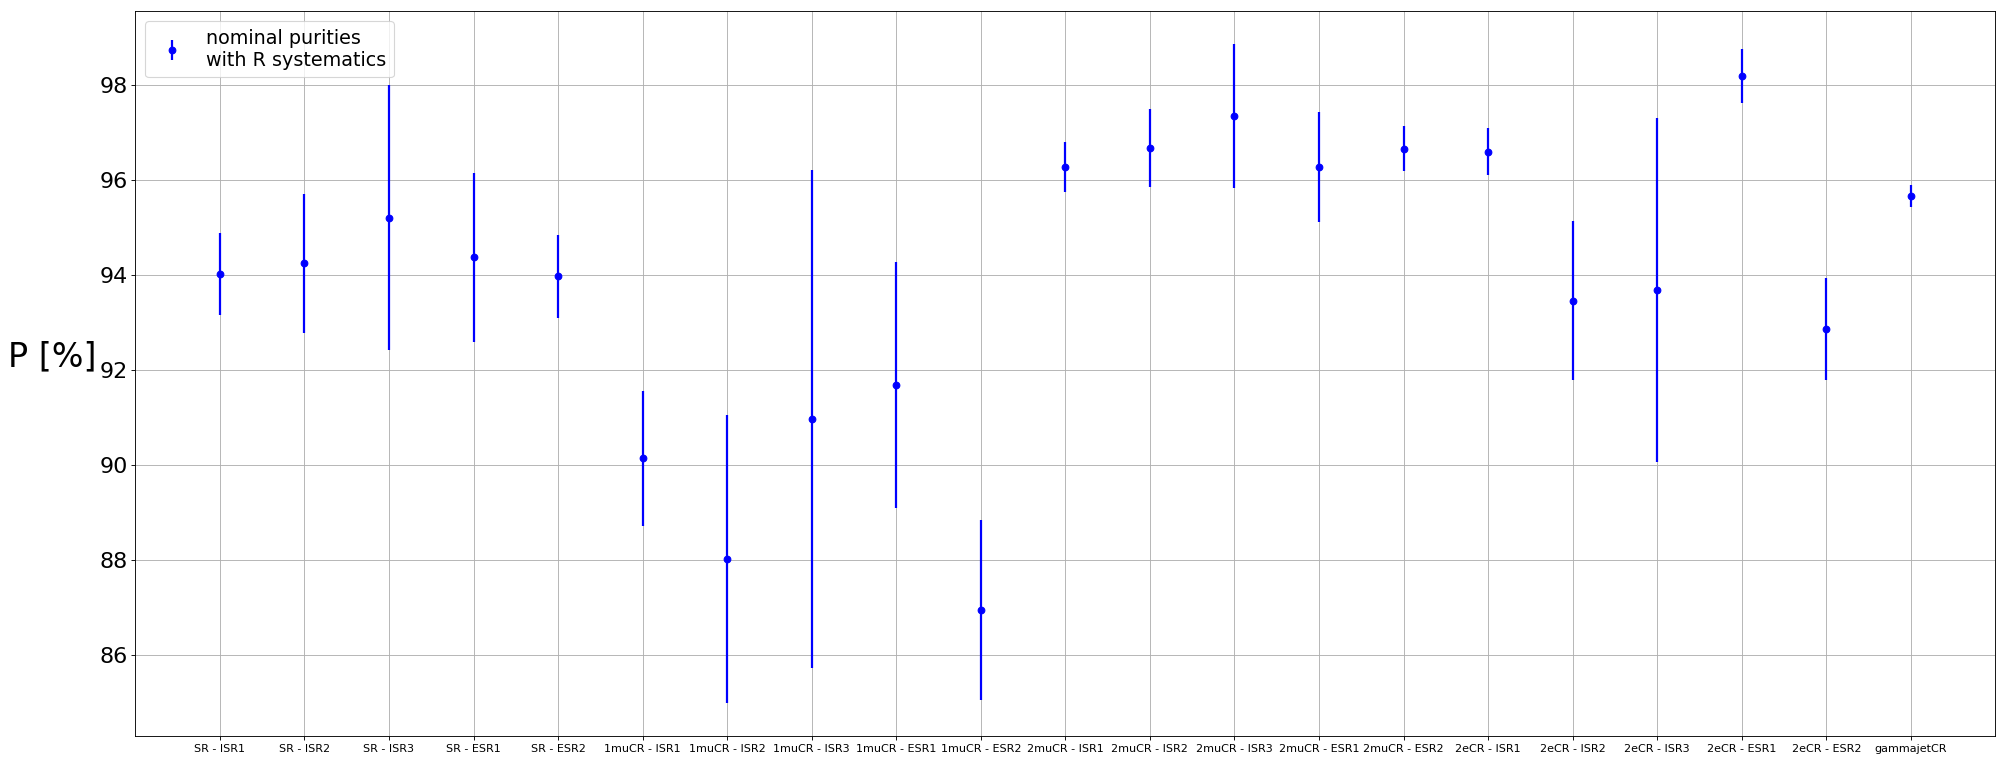

In [47]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_up['mean'],      yerr=purity_up['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='R + systematics')
plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=nominal_purity['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label='nominal R')
plt.errorbar([i+0.08 for i in range(21)], purity_down['mean'],    yerr=purity_down['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label='R - systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], nominal_purity['mean'], yerr=R_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith R systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

## Final analysis

Text(0, 0.5, 'P [%]        ')

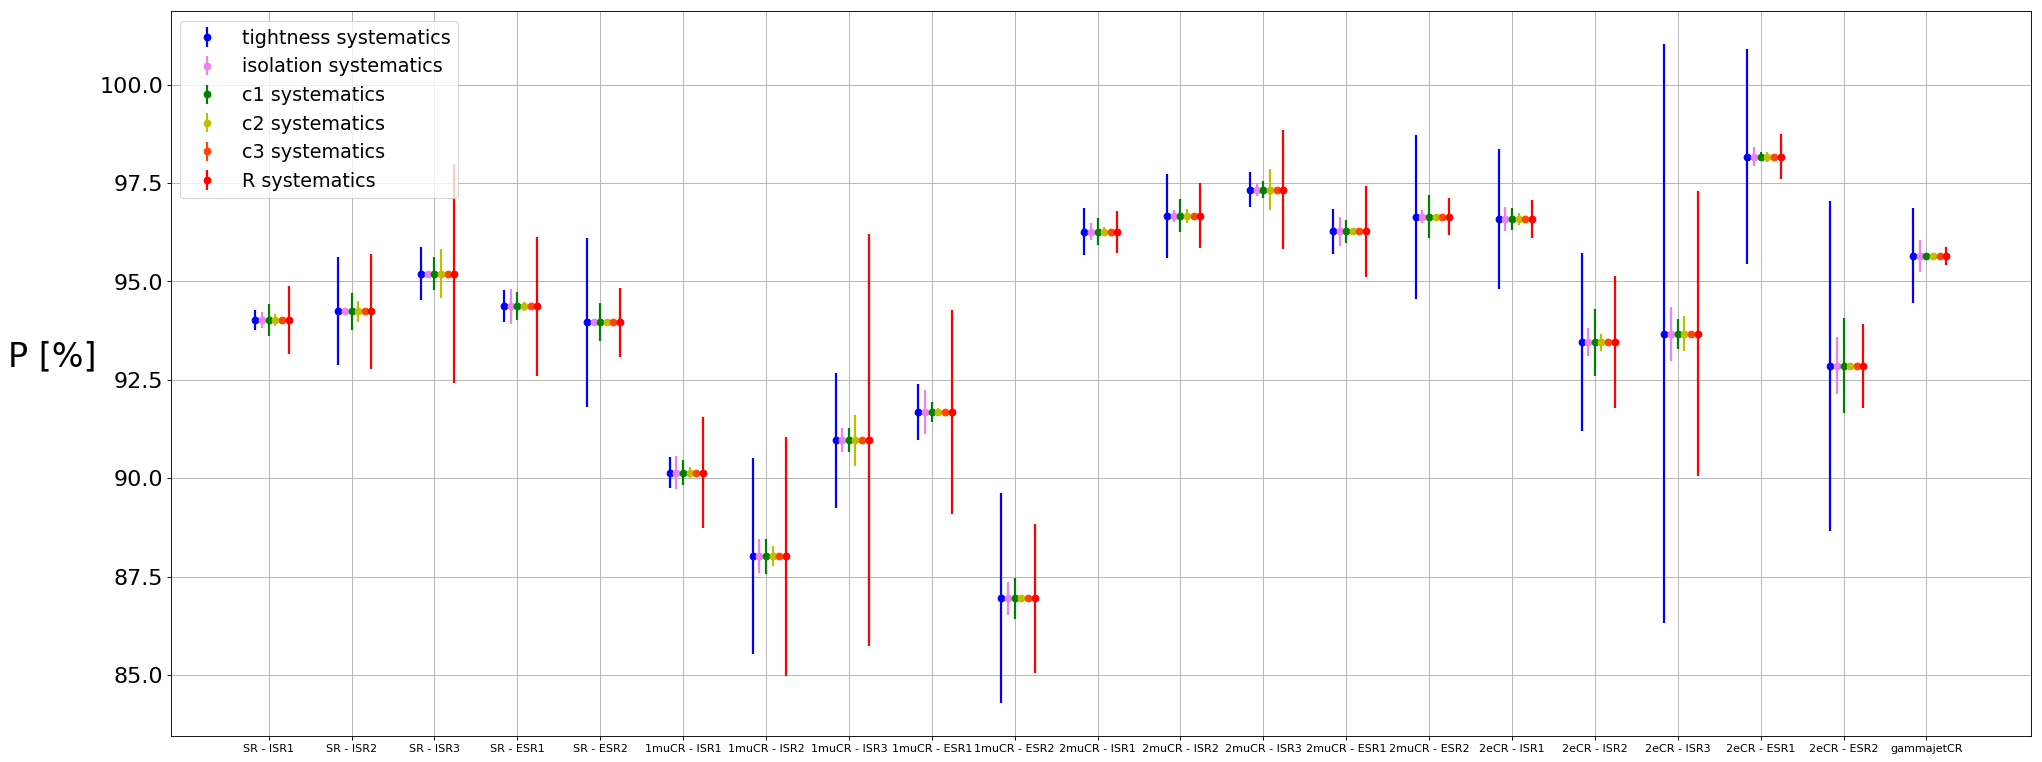

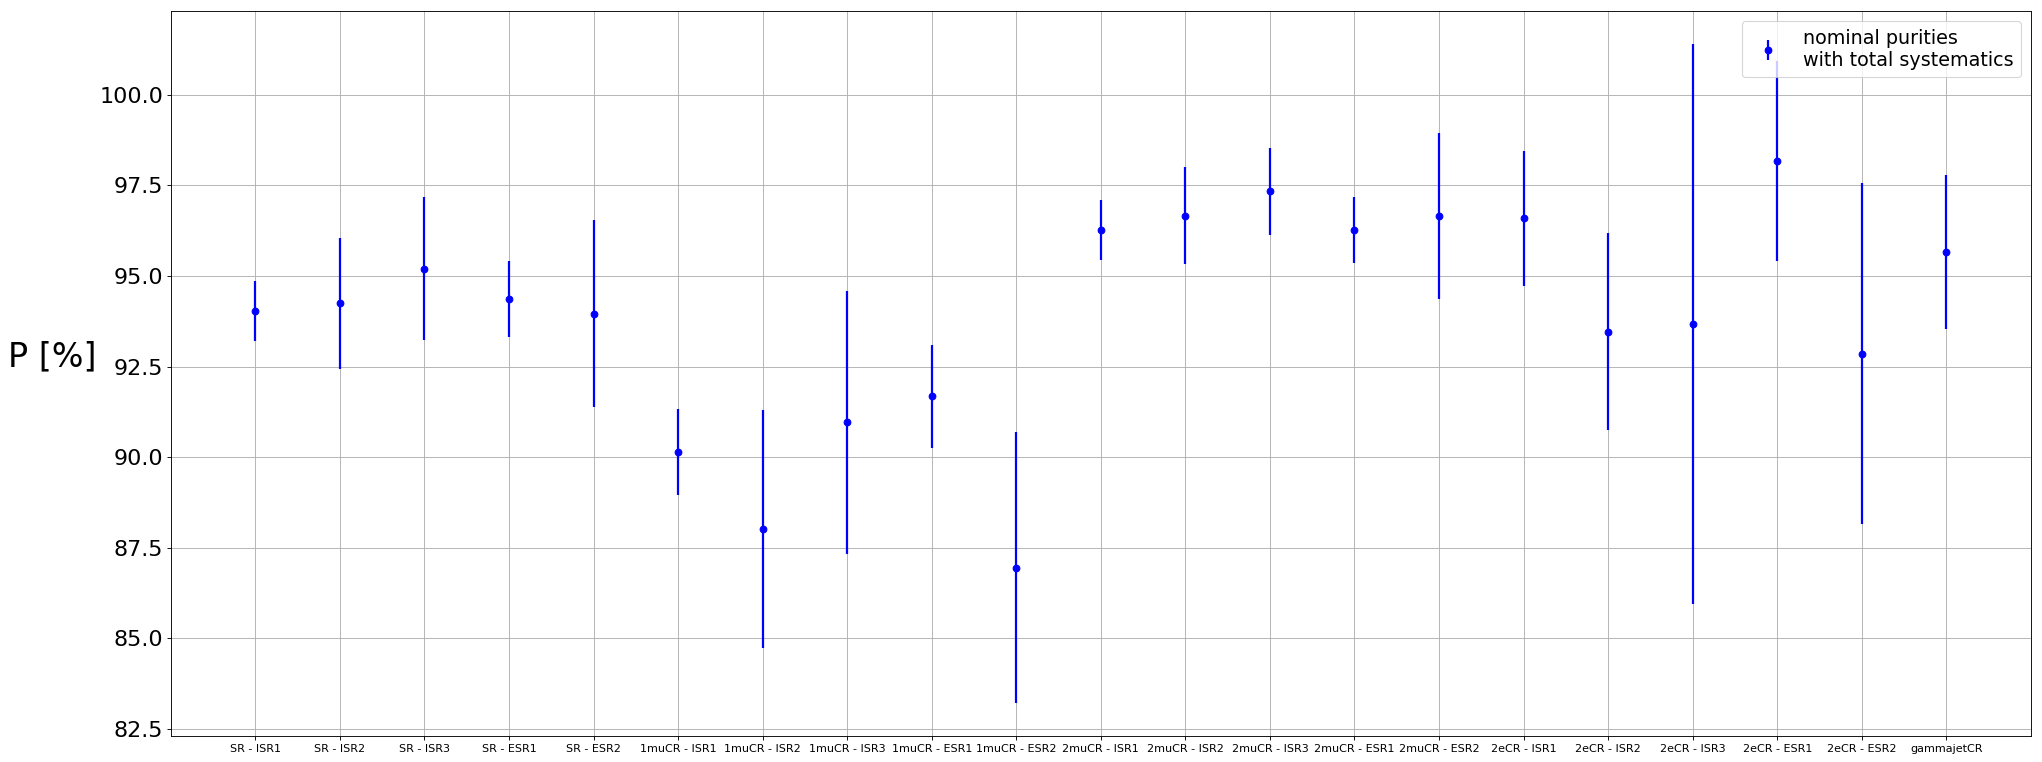

In [48]:
total_systematics = [math.sqrt(pow(isolation_systematics[i],2) + pow(tightness_systematics[i],2) + \
                               pow(c1_systematics[i],2) + pow(c3_systematics[i],2) + \
                               pow(sigma_c1_[i],2) + pow(sigma_c2_[i],2) +\
                               pow(sigma_c3_[i],2) + pow(sigma_R_[i],2))  for i in range(21)]



plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.16 for i in range(21)], purity_isolation['iso']['mean'], yerr=tightness_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='tightness systematics')
plt.errorbar([i-0.08 for i in range(21)], purity_isolation['iso']['mean'], yerr=isolation_systematics, fmt='violet', marker='o', linestyle='', linewidth=2, label='isolation systematics')
plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=c1_systematics, fmt='g', marker='o', linestyle='', linewidth=2, label='c1 systematics')
plt.errorbar([i+0.08 for i in range(21)], purity_isolation['iso']['mean'], yerr=c2_systematics, fmt='y', marker='o', linestyle='', linewidth=2, label='c2 systematics')
plt.errorbar([i+0.16 for i in range(21)], purity_isolation['iso']['mean'], yerr=c3_systematics, fmt='orangered', marker='o', linestyle='', linewidth=2, label='c3 systematics')
plt.errorbar([i+0.24 for i in range(21)], purity_isolation['iso']['mean'], yerr=R_systematics, fmt='r', marker='o', linestyle='', linewidth=2, label='R systematics')



plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)





plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=total_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith total systematics')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

Text(0, 0.5, 'P [%]        ')

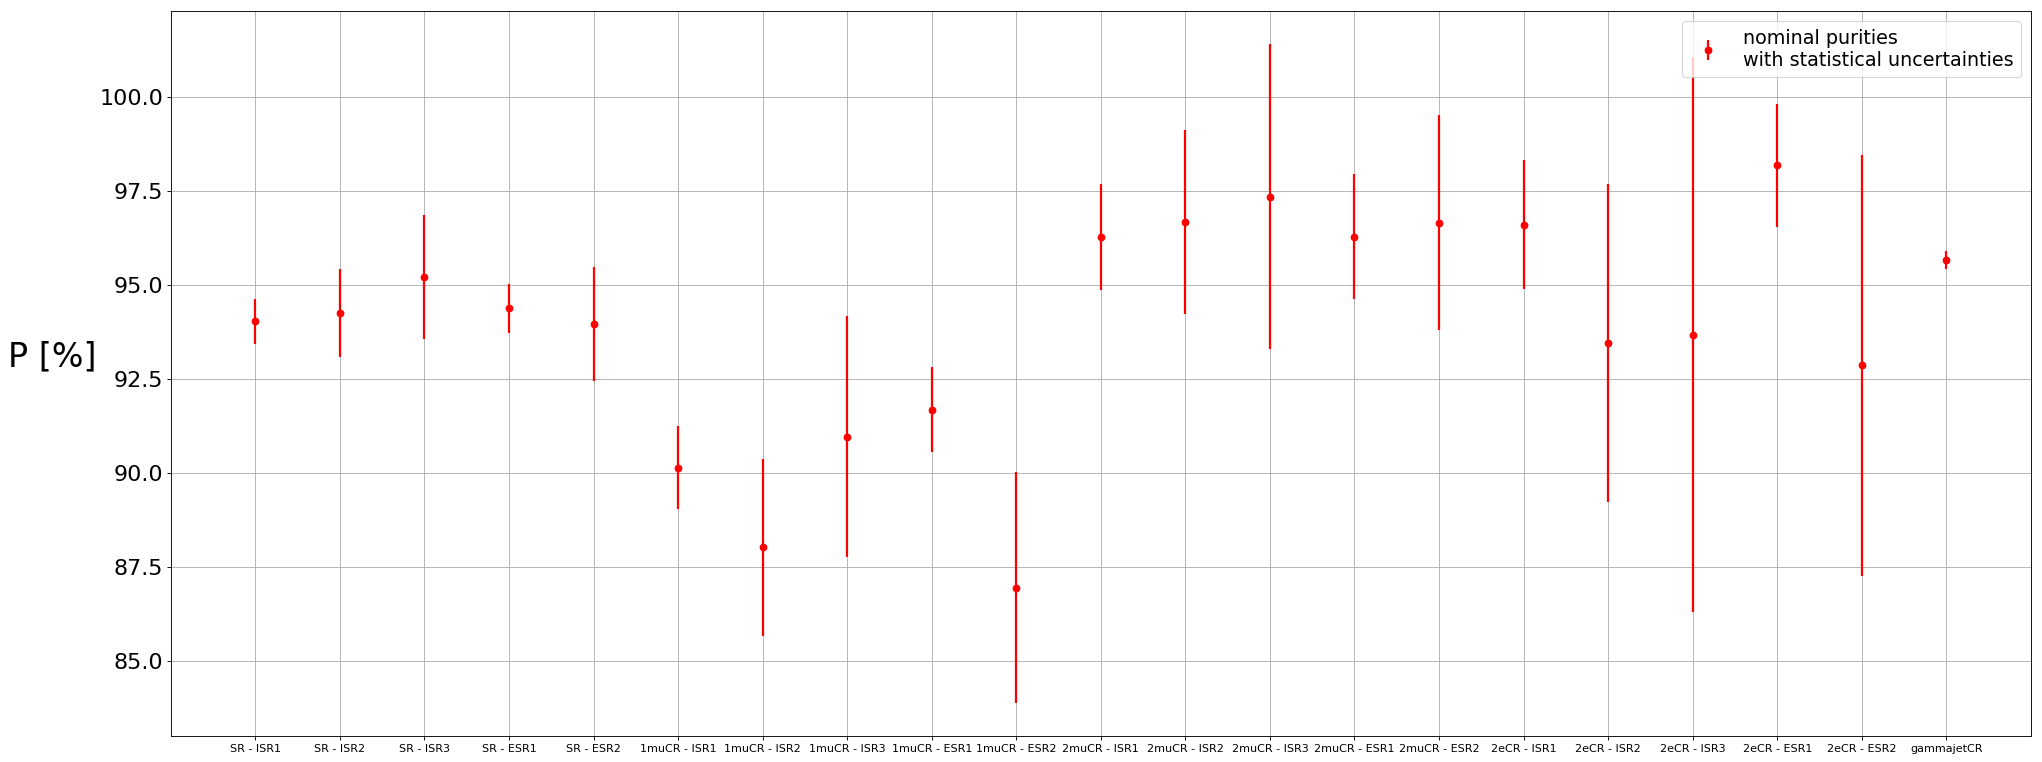

In [49]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=purity_isolation['iso']['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith statistical uncertainties')

plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

Text(0, 0.5, 'P [%]        ')

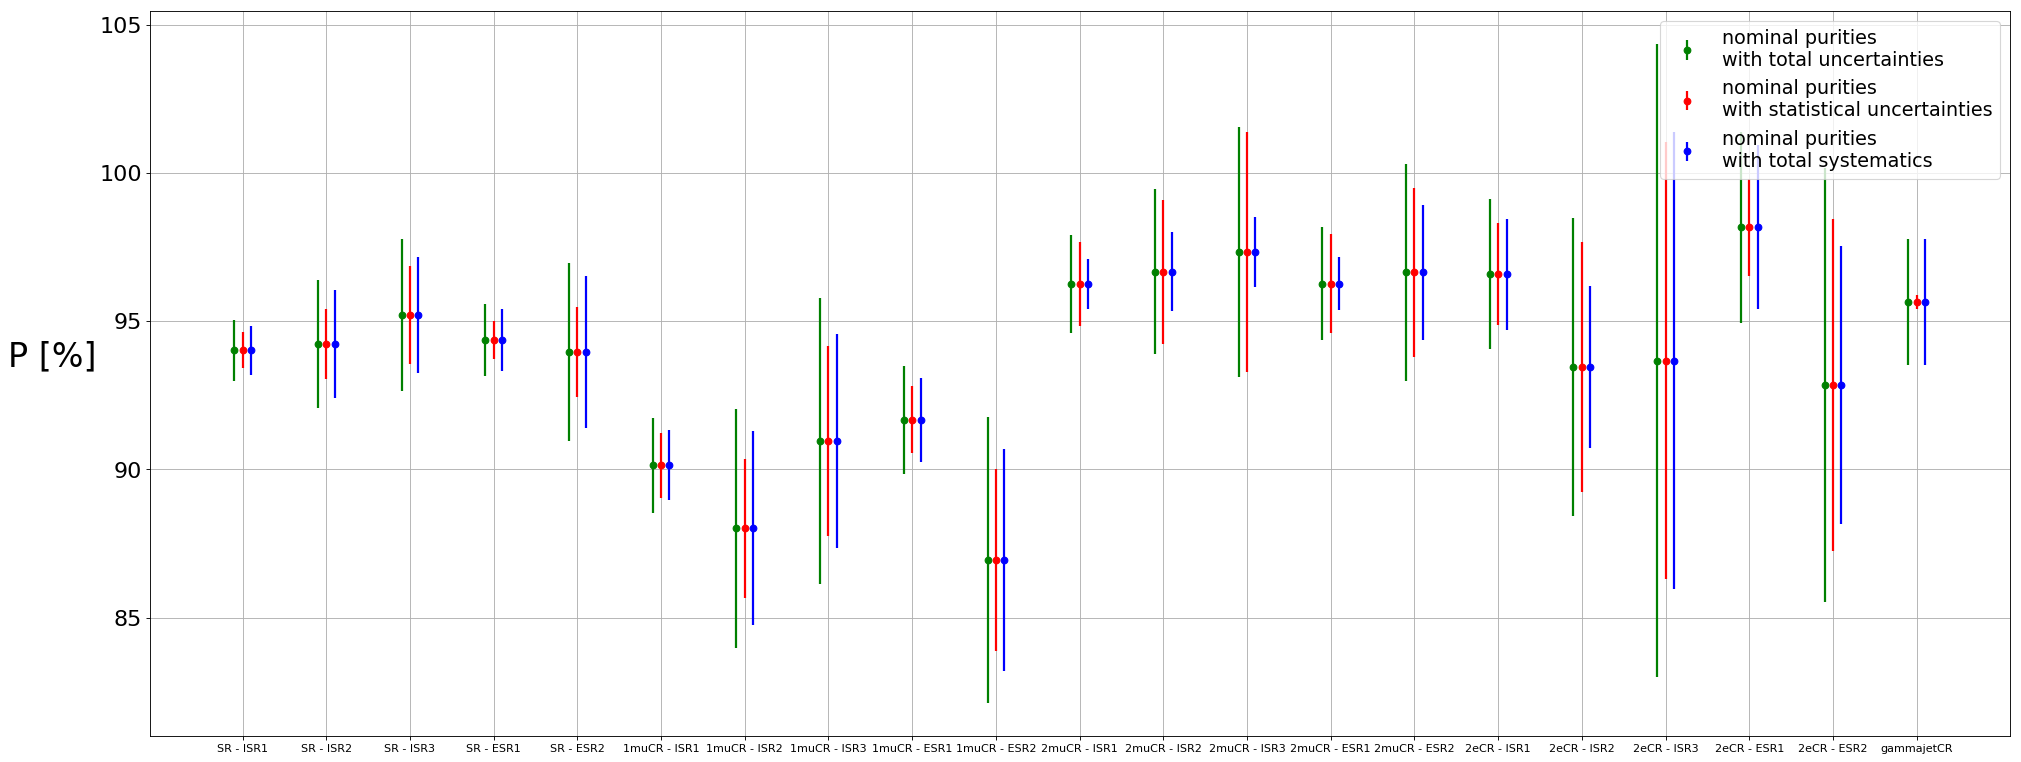

In [50]:
total_error = [math.sqrt(pow(total_systematics[i],2) + pow(purity_isolation['iso']['sigma'][i],2)) for i in range(21)]

plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.1 for i in range(21)], purity_isolation['iso']['mean'], yerr=total_error, fmt='g', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith total uncertainties')
plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=purity_isolation['iso']['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith statistical uncertainties')
plt.errorbar([i+0.1 for i in range(21)], purity_isolation['iso']['mean'], yerr=total_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith total systematics')


plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

## Data saving

In [51]:
# convert purities in number of photons

mean         = [0 for _ in range(21)]
sigma        = [0 for _ in range(21)]
syst_tight   = [0 for _ in range(21)]
syst_iso     = [0 for _ in range(21)]
syst_c1      = [0 for _ in range(21)]
sigma_c1     = [0 for _ in range(21)]
syst_c2      = [0 for _ in range(21)]
sigma_c2     = [0 for _ in range(21)]
syst_c3      = [0 for _ in range(21)]
sigma_c3     = [0 for _ in range(21)]
syst_R       = [0 for _ in range(21)]
sigma_R      = [0 for _ in range(21)]
syst_total   = [0 for _ in range(21)]
total_error_ = [0 for _ in range(21)]


Na = [data[cr][met_region]['tight']['iso']['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight']['iso']['Na']]
    
n = 0
for i in range(21):
    
    mean[i]         = round((100-nominal_purity['mean'][i]) * Na[i] / 100,n)
    sigma[i]        = round(nominal_purity['sigma'][i] * Na[i] / 100,n)
    syst_tight[i]   = round(tightness_systematics[i] * Na[i] / 100,n)
    syst_iso[i]     = round(isolation_systematics[i] * Na[i] / 100,n)
    syst_c1[i]      = round(c1_systematics[i] * Na[i] / 100,n)
    sigma_c1[i]     = round(sigma_c1_[i] * Na[i] / 100,n)
    syst_c2[i]      = round(c2_systematics[i] * Na[i] / 100,n)
    sigma_c2[i]     = round(sigma_c2_[i] * Na[i] / 100,n)
    syst_c3[i]      = round(c3_systematics[i] * Na[i] / 100,n)
    sigma_c3[i]     = round(sigma_c3_[i] * Na[i] / 100,n)
    syst_R[i]       = round(R_systematics[i] * Na[i] / 100,n)
    sigma_R[i]      = round(sigma_R_[i] * Na[i] / 100,n)
    syst_total[i]   = round(total_systematics[i] * Na[i] / 100,n)
    total_error_[i] = round(total_error[i] * Na[i] / 100,n)

In [52]:
csv_data = [regions, mean, sigma, syst_tight, syst_iso, sigma_c1, sigma_c2, sigma_c3, sigma_R,\
            syst_c1, syst_c3, syst_total, total_error_]


for i in range(1, len(csv_data)):
    csv_data[i] = np_round(csv_data[i], decimals=4)
    
    
csv_data = zip(*csv_data)


file = 'jets_faking_photons_17.txt'

with open(file, 'w+') as csv_file:
    writer = csv.writer(csv_file, delimiter='\t')
    writer.writerow(['region', 'mean', 'sigma', 'tightness syst',\
                     'isolation syst', 'c1 sigma', 'c2 sigma', 'c3 sigma', 'R sigma',\
                     'c1 syst', 'c3 syst', 'total syst', 'total error'])
    writer.writerows(csv_data)

In [53]:
#pd.set_option('precision', 15)
test = pd.read_csv(file, sep='\t')
print(test)

          region   mean  sigma  tightness syst  isolation syst  c1 sigma  \
0      SR - ISR1  236.0   24.0            10.0             8.0       4.0   
1      SR - ISR2   64.0   13.0            15.0             1.0       2.0   
2      SR - ISR3   18.0    6.0             2.0             0.0       1.0   
3      SR - ESR1  160.0   19.0            12.0            13.0       3.0   
4      SR - ESR2   44.0   11.0            16.0             1.0       1.0   
5   1muCR - ISR1  152.0   17.0             6.0             7.0       1.0   
6   1muCR - ISR2   57.0   11.0            12.0             2.0       1.0   
7   1muCR - ISR3   15.0    5.0             3.0             1.0       0.0   
8   1muCR - ESR1   89.0   12.0             8.0             6.0       1.0   
9   1muCR - ESR2   40.0    9.0             8.0             1.0       1.0   
10  2muCR - ISR1   12.0    5.0             2.0             1.0       0.0   
11  2muCR - ISR2    4.0    3.0             1.0             0.0       0.0   
12  2muCR - 

(0, 10)

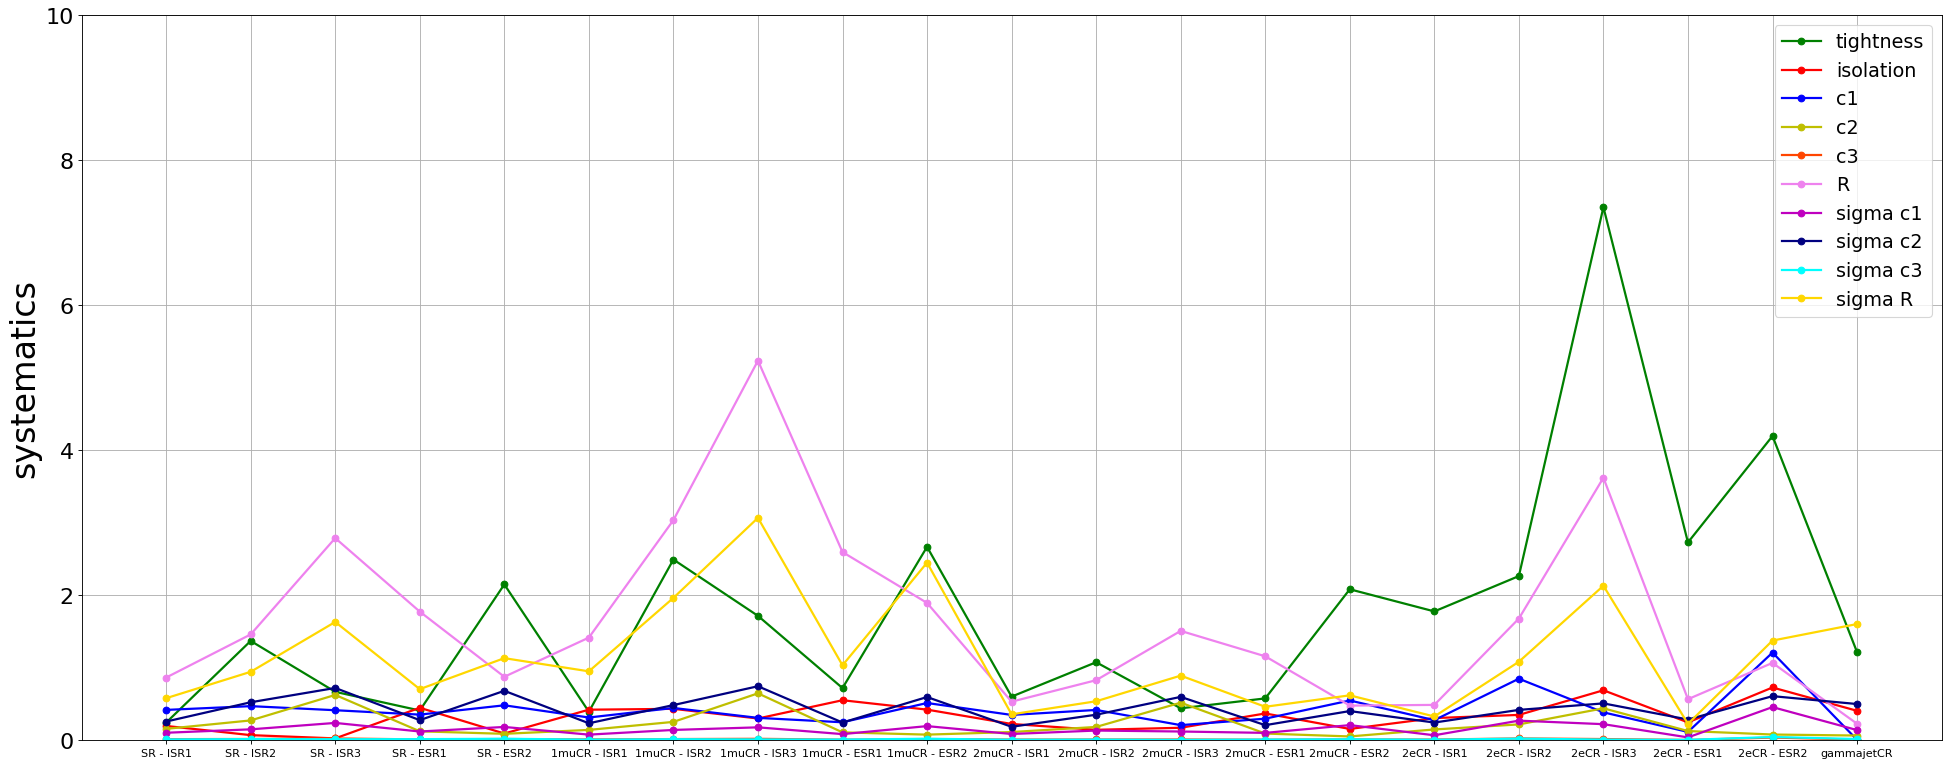

In [54]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.0 for i in range(21)], tightness_systematics, fmt='g', marker='o', linestyle='-', linewidth=2, label='tightness')
plt.errorbar([i-0.0 for i in range(21)], isolation_systematics, fmt='r', marker='o', linestyle='-', linewidth=2, label='isolation')
plt.errorbar([i-0.0 for i in range(21)], c1_systematics, fmt='b', marker='o', linestyle='-', linewidth=2, label='c1')
plt.errorbar([i+0.0 for i in range(21)], c2_systematics, fmt='y', marker='o', linestyle='-', linewidth=2, label='c2')
plt.errorbar([i+0.0 for i in range(21)], c3_systematics, fmt='orangered', marker='o', linestyle='-', linewidth=2, label='c3')
plt.errorbar([i+0.0 for i in range(21)], R_systematics, fmt='violet', marker='o', linestyle='-', linewidth=2, label='R')

plt.errorbar([i+0.0 for i in range(21)], sigma_c1_, fmt='m', marker='o', linestyle='-', linewidth=2, label='sigma c1')

plt.errorbar([i+0.0 for i in range(21)], sigma_c2_, fmt='navy', marker='o', linestyle='-', linewidth=2, label='sigma c2')

plt.errorbar([i+0.0 for i in range(21)], sigma_c3_, fmt='aqua', marker='o', linestyle='-', linewidth=2, label='sigma c3')

plt.errorbar([i+0.0 for i in range(21)], sigma_R_, fmt='gold', marker='o', linestyle='-', linewidth=2, label='sigma R')





plt.xticks(range(21), regions)
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('systematics', rotation=90, fontsize=30)
plt.ylim([0,10])


# Previous analysis comparision

In [55]:
old_mean  = [152.1, 36.7, 9.6, 114.6, 27, 88.1, 23.4, 3.4, 64.9, 20.5, 7.2, 4.8, 1.0, 0.9, 3.5, 14.3, 5.4, 1.6, 7.8, 3.1, 284.4]
old_sigma = [21.3, 9, 4.4, 19.7, 7.9, 14.8, 7.2, 2.1, 13, 7.5, 3.7, 2.4, 0.9, 2.4, 2.2, 4.5, 2.5, 1.1, 3.5, 2.0, 24.4]
old_sys   = [4.2, 12.2, 9, 13.7, 4.8, 12.6, 7.4, 2.9, 8.8, 6.6, 0.5, 1.3, 0.8, 0.7, 0.7, 3.2, 1.7, 1.5, 2, 0.9, 15]
old_total = [math.sqrt( pow(old_sigma[i],2) + pow(old_sys[i],2) ) for i in range(21)]

Text(0, 0.5, 'Fake photons number')

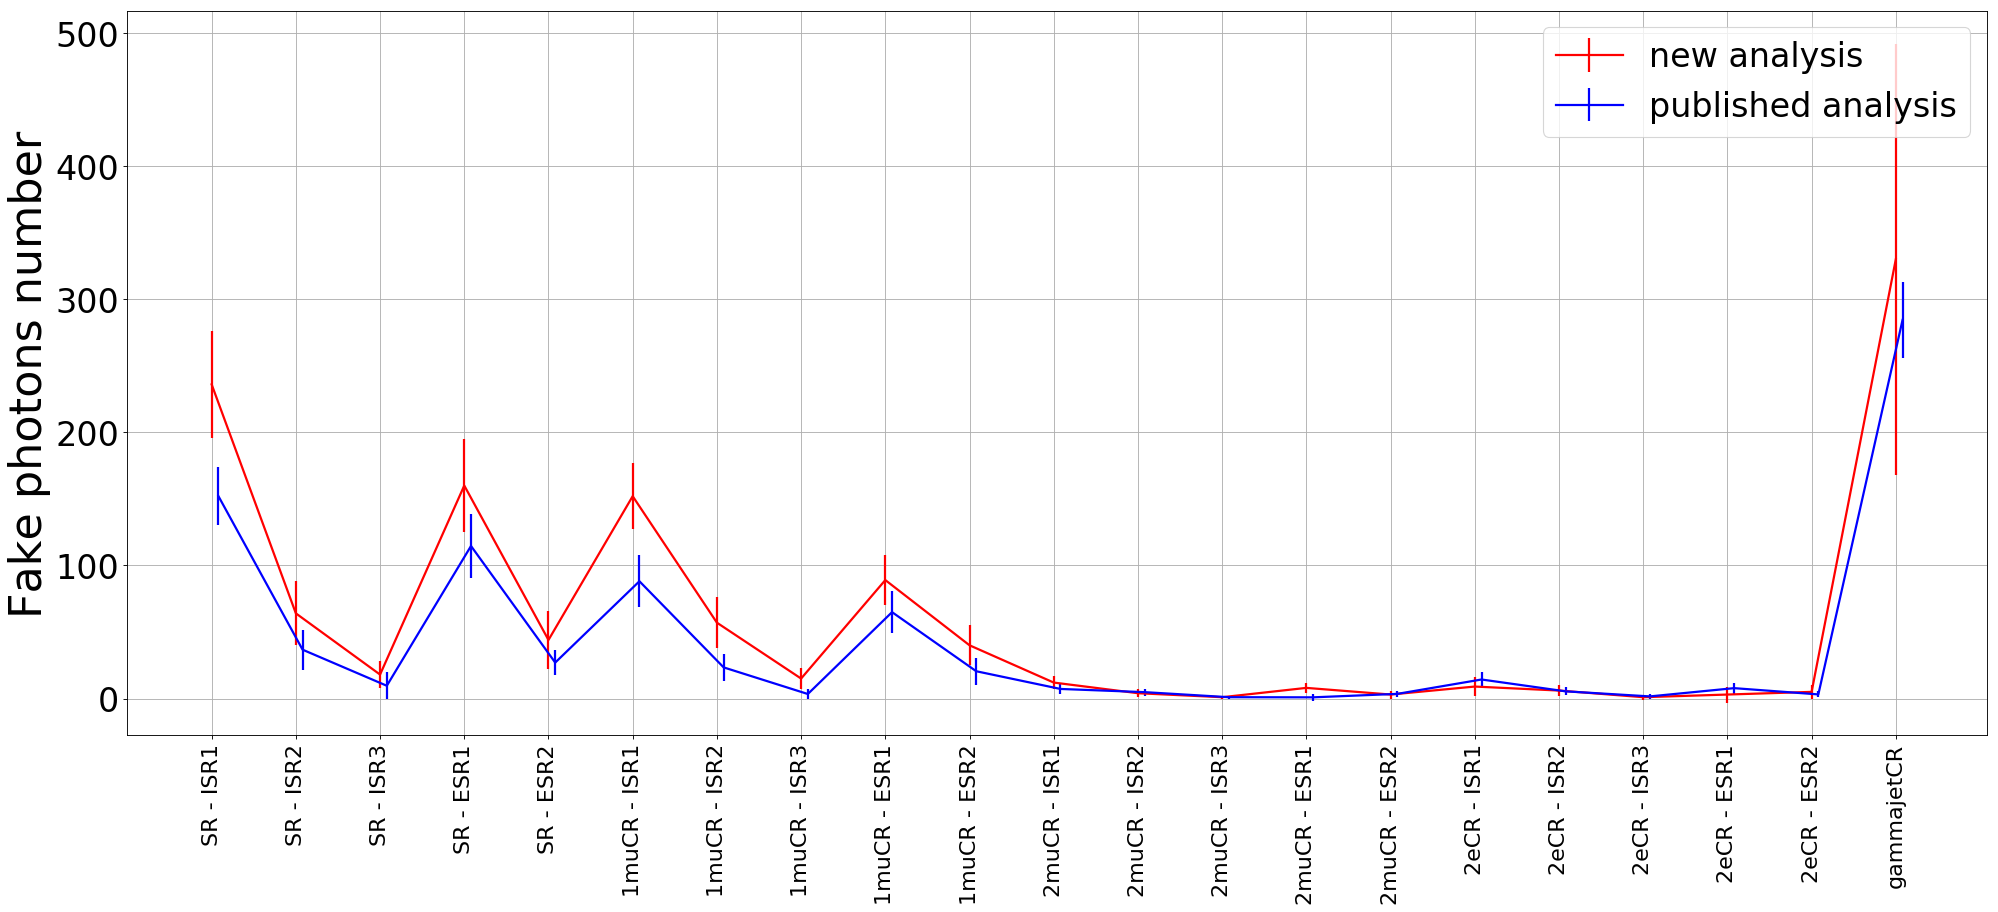

In [56]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.00 for i in range(21)], mean,     yerr=total_error_,  fmt='r', marker='', linestyle='-', linewidth=2, label='new analysis')
plt.errorbar([i+0.08 for i in range(21)], old_mean, yerr=old_total,     fmt='b', marker='', linestyle='-', linewidth=2, label='published analysis')



plt.xticks(range(21), regions, fontsize=20, rotation='vertical')
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.grid()
plt.ylabel('Fake photons number', rotation=90, fontsize=40)

In [27]:
# evaluate compatibility

for i in range(21):
    
    new_up   = mean[i] + total_error_[i]
    new_down = mean[i] - total_error_[i]
    old_up   = old_mean[i] + old_total[i]
    old_down = old_mean[i] - old_total[i]
    
    if (new_down > old_up or new_up < old_down):
        print(regions[i] + '\t not compatible')
    else: 
        print(regions[i] + '\t compatible')

SR - ISR1	 not compatible
SR - ISR2	 compatible
SR - ISR3	 compatible
SR - ESR1	 compatible
SR - ESR2	 compatible
1muCR - ISR1	 not compatible
1muCR - ISR2	 not compatible
1muCR - ISR3	 compatible
1muCR - ESR1	 compatible
1muCR - ESR2	 compatible
2muCR - ISR1	 compatible
2muCR - ISR2	 compatible
2muCR - ISR3	 compatible
2muCR - ESR1	 not compatible
2muCR - ESR2	 compatible
2eCR - ISR1	 compatible
2eCR - ISR2	 compatible
2eCR - ISR3	 compatible
2eCR - ESR1	 compatible
2eCR - ESR2	 compatible
gammajetCR	 compatible
